Step 0

In [1]:
!pip install scikit-learn pandas numpy torch torchvision torchaudio pytorch-lightning einops sktime==0.25.0 tsai pyts ptflops onnx onnxruntime onnxsim matplotlib seaborn orange3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tsai to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of tsai to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of orange3 to determine which version is compatible with other requirements. This could take a while.
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of thinc to determine which version is com

In [ ]:
# =====================================================================
# 0. Environment Initialization and Dependency Conflict Resolution in Google Colab
# =====================================================================

!pip uninstall -y numpy pandas scikit-learn
!pip install numpy>=1.24.0
!pip install pandas>=2.0.0
!pip install scikit-learn>=1.6.0
!pip install torch torchvision torchaudio pytorch-lightning einops
!pip install sktime==0.25.0 tsai pyts
!pip install ptflops onnx onnxruntime onnxsim
!pip install matplotlib seaborn orange3

print("\n" + "="*50)
print("Click Restart")
print("="*50)

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: pandas 2.1.4
Uninstalling pandas-2.1.4:
  Successfully uninstalled pandas-2.1.4
Found existing installation: scikit-learn 1.3.2
Uninstalling scikit-learn-1.3.2:
  Successfully uninstalled scikit-learn-1.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyts 0.13.0 requires scikit-learn>=1.2.0, which is not installed.
tsai 0.2.17 requires scikit-learn>=0.24.1, which is not installed.
orange3 3.37.0 requires pandas!=1.5.0,!=2.0.0,>=1.4.0, which is not installed.
orange3 3.37.0 requires scikit-learn<1.5.0,>=1.3.0, which is not installed.
opentsne 1.0.2 requires scikit-learn>=0.20, which is not installed.
catboost 1.2.8 requires pandas>=0.24, which is not installed.
sktime 0.25.0 requires pandas<2.2.0,>=1.1, which is not instal

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
^C


In [1]:
# Compatible version
!pip install -q torch torchvision torchaudio
!pip install -q pytorch-lightning einops
!pip install -q ptflops onnx onnxruntime onnxsim
!pip install -q matplotlib seaborn orange3 psutil

print("\n finished")

import torch
import numpy as np
import pandas as pd
import random
import os
import sklearn
import pytorch_lightning as pl
import matplotlib
import seaborn as sns
import platform
import psutil

# ------------------------------------------
# 0.1 Set a fixed random seed
# ------------------------------------------
def set_all_seeds(seed=42):
    """All possible random seeds were fixed to ensure reproducibility"""
    # Python Random seed
    random.seed(seed)

    # Numpy Random seed
    np.random.seed(seed)

    # PyTorch Random seed
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # Multi-GPU setting

    # CUDNN deterministic setting
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

    # Environment variable
    os.environ['PYTHONHASHSEED'] = str(seed)

    print(f" All random seeds were set to: {seed}")

# Set random seed
set_all_seeds(42)

# ------------------------------------------
# 0.2 Enable CUDA BF16 optimization
# ------------------------------------------
# Set matrix multiplication precision to high-performance mode
torch.set_float32_matmul_precision('high')
print(" CUDA BF16 (float32_matmul_precision='high')")

# ------------------------------------------
# 0.3 Check hardware information (via shell commands)
# ------------------------------------------
print("\n" + "=" * 50)
print("Hardware information (Shell)")
print("=" * 50)

# CPU information
print("\n--- CPU information ---")
!lscpu | grep -E "Model name|CPU\(s\)|Thread|Core|Socket" | head -10

# Memory information
print("\n--- Memory information ---")
!free -h

# GPU information
print("\n--- GPU information ---")
if torch.cuda.is_available():
    !nvidia-smi --query-gpu=name,memory.total,memory.free,compute_cap --format=csv
else:
    print("GPU not detected")

# ------------------------------------------
# 0.4 Check hardware information (Python method)
# ------------------------------------------
print("\n" + "=" * 50)
print("Hardware information (Python)")
print("=" * 50)

# CPU
print("\n--- CPU information ---")
print(f"Processor architecture: {platform.machine()}")
print(f"Processor: {platform.processor() or 'N/A'}")
print(f"Number of physical CPU cores: {psutil.cpu_count(logical=False) or 'N/A'}")
print(f"Number of logical CPU cores: {psutil.cpu_count(logical=True)}")
print(f"CPU utilization: {psutil.cpu_percent(interval=1)}%")

# Memory
print("\n--- Memory information ---")
memory = psutil.virtual_memory()
print(f"Total memory: {memory.total / (1024**3):.2f} GB")
print(f"Available memory: {memory.available / (1024**3):.2f} GB")
print(f"Memory usage: {memory.percent}%")

# GPU (PyTorch)
print("\n--- GPU information (PyTorch) ---")
if torch.cuda.is_available():
    print(f"CUDA available: {torch.cuda.is_available()}")
    print(f"CUDA version: {torch.version.cuda}")
    print(f"GPU number: {torch.cuda.device_count()}")

    for i in range(torch.cuda.device_count()):
        props = torch.cuda.get_device_properties(i)
        print(f"\nGPU {i}: {torch.cuda.get_device_name(i)}")
        print(f"  - Compute capability: {props.major}.{props.minor}")
        print(f"  - Total memory: {props.total_memory / (1024**3):.2f} GB")
        print(f"  - Number of processors: {props.multi_processor_count}")
else:
    print("CUDA unavailable; using CPU")

# ------------------------------------------
# 0.5 Software package version information
# ------------------------------------------
print("\n" + "=" * 50)
print("Package Version Information")
print("=" * 50)

# Create a version information dictionary
versions = {
    "Python": platform.python_version(),
    "PyTorch": torch.__version__,
    "NumPy": np.__version__,
    "Pandas": pd.__version__,
    "Scikit-learn": sklearn.__version__,
    "PyTorch Lightning": pl.__version__,
    "Matplotlib": matplotlib.__version__,
    "Seaborn": sns.__version__,
}

# Attempt to import and get versions of optional packages
optional_packages = {
    "einops": "Einops",
    "sktime": "Sktime",
    "tsai": "TSAI",
    "pyts": "PyTS",
    "onnx": "ONNX",
    "onnxruntime": "ONNXRuntime",
    "Orange": "Orange3"
}

for module_name, display_name in optional_packages.items():
    try:
        module = __import__(module_name)
        versions[display_name] = module.__version__
    except:
        versions[display_name] = "Not installed"

# Print version table
print("\nPackage version table:")
print("-" * 40)
print(f"{'Package':<20} {'Version':<20}")
print("-" * 40)
for package, version in sorted(versions.items()):
    print(f"{package:<20} {version:<20}")
print("-" * 40)

# ------------------------------------------
# 0.6 Create version information DataFrame
# ------------------------------------------
version_df = pd.DataFrame(list(versions.items()), columns=['Package', 'Version'])
version_df = version_df.sort_values('Package').reset_index(drop=True)

# Save version information
version_df.to_csv('environment_versions.csv', index=False)
print("\nVersion information saved to environment_versions.csv")

# ------------------------------------------
# 0.7 Environment validation
# ------------------------------------------
print("\n" + "=" * 50)
print("Environment Validation")
print("=" * 50)

# Test PyTorch
print("\nTesting PyTorch:")
x = torch.randn(3, 3)
if torch.cuda.is_available():
    x = x.cuda()
    print(f"PyTorch GPU test successful: {x.device}")
else:
    print(f"PyTorch CPU test successful")

# Test matrix multiplication precision setting
print(f"\n Matrix multiplication precision: {torch.get_float32_matmul_precision()}")

# Test random seed consistency
print("\nTesting random seed consistency:")
print(f"Random: {random.random():.6f}")
print(f"NumPy: {np.random.rand():.6f}")
print(f"PyTorch: {torch.rand(1).item():.6f}")

# ------------------------------------------
# 0.8 Environment summary
# ------------------------------------------
def print_environment_summary():
    """Print environment configuration summary"""
    print("\n" + "=" * 50)
    print("Environment Configuration Summary")
    print("=" * 50)

    # Device information
    if torch.cuda.is_available():
        device_name = torch.cuda.get_device_name(0)
        device_type = f"GPU ({device_name})"
    else:
        device_type = "CPU"

    print(f"Execution device: {device_type}")
    print(f"Python version: {platform.python_version()}")
    print(f"PyTorch version: {torch.__version__}")

    if torch.cuda.is_available():
        print(f"CUDA version: {torch.version.cuda}")
        print(f"cuDNN version: {torch.backends.cudnn.version()}")

    print(f"Random seed: 42")
    print(f"Matrix multiplication precision: {torch.get_float32_matmul_precision()}")
    print(f"Deterministic computation: {torch.backends.cudnn.deterministic}")

    # Memory usage
    memory = psutil.virtual_memory()
    print(f"Memory usage: {memory.percent}% ({memory.used / (1024**3):.1f}/{memory.total / (1024**3):.1f} GB)")

# Print summary
print_environment_summary()


print("Colab environment initialization completed")


 finished
 All random seeds were set to: 42
 CUDA BF16 (float32_matmul_precision='high')

Hardware information (Shell)

--- CPU information ---
CPU(s):                               12
On-line CPU(s) list:                  0-11
Model name:                           Intel(R) Xeon(R) CPU @ 2.20GHz
Thread(s) per core:                   2
Core(s) per socket:                   6
Socket(s):                            1
NUMA node0 CPU(s):                    0-11

--- Memory information ---
               total        used        free      shared  buff/cache   available
Mem:            52Gi       1.7Gi        28Gi       7.0Mi        22Gi        50Gi
Swap:             0B          0B          0B

--- GPU information ---
name, memory.total [MiB], memory.free [MiB], compute_cap
NVIDIA L4, 23034 MiB, 22692 MiB, 8.9

Hardware information (Python)

--- CPU information ---
Processor architecture: x86_64
Processor: x86_64
Number of physical CPU cores: 6
Number of logical CPU cores: 12
CPU utilization:

Step 1

PAMAP2_Dataset.zip      [  <=>               ] 656.29M  16.1MB/s    in 39s     
 Download completed

 Extracting the dataset...
 Extraction completed

 Dataset file structure:
total 188
drwxr-xr-x 4 root root  4096 Jul 31 07:10 .
drwxr-xr-x 1 root root  4096 Jul 31 07:09 ..
-rw-r--r-- 1 root root 44308 Jul 31 07:10 DataCollectionProtocol.pdf
-rw-r--r-- 1 root root 26087 Jul 31 07:10 DescriptionOfActivities.pdf
drwxr-xr-x 2 root root  4096 Jul 31 07:09 Optional
-rw-r--r-- 1 root root 19175 Jul 31 07:10 PerformedActivitiesSummary.pdf
drwxr-xr-x 2 root root  4096 Jul 31 07:09 Protocol
-rw-r--r-- 1 root root 59070 Jul 31 07:10 readme.pdf
-rw-r--r-- 1 root root 17851 Jul 31 07:10 subjectInformation.pdf

 Contents of the Protocol folder:
total 1271456
drwxr-xr-x 2 root root      4096 Jul 31 07:09 .
drwxr-xr-x 4 root root      4096 Jul 31 07:10 ..
-rw-r--r-- 1 root root 141698539 Jul 31 07:09 subject101.dat
-rw-r--r-- 1 root root 207349310 Jul 31 07:09 subject102.dat
-rw-r--r-- 1 root root 11

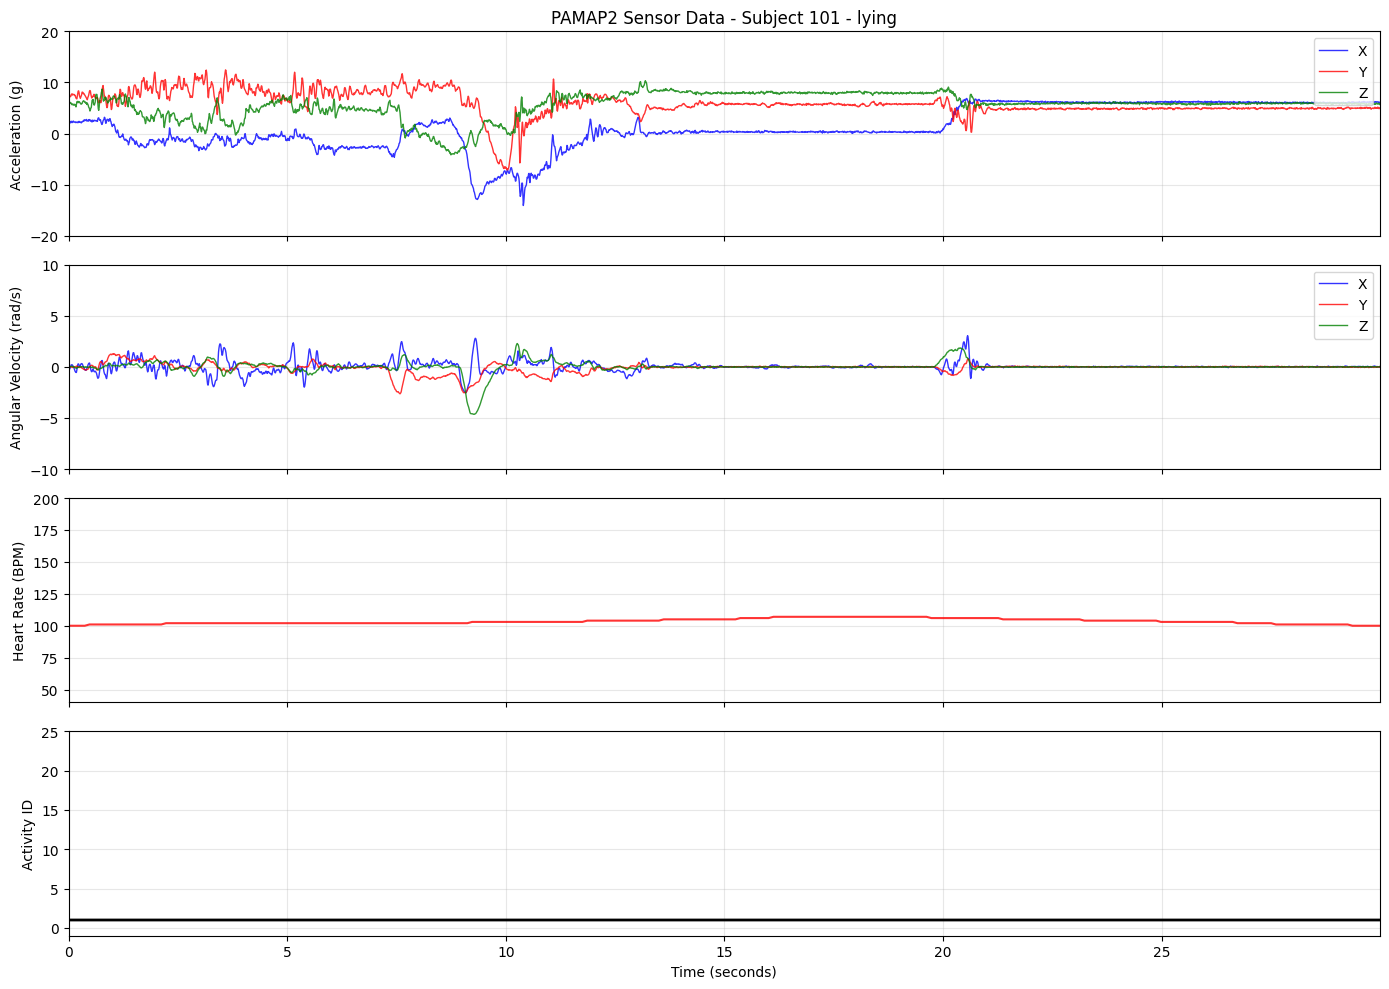


 PAMAP2 dataset processing completed
   - Final data shape: (1942872, 56)
   - Memory usage: 938.49 MB


In [2]:
# ============================================
# PAMAP2 Dataset Download and Parsing
# ============================================

import os
import zipfile
import glob
import pandas as pd
import numpy as np
from typing import Dict, List, Tuple
import warnings
warnings.filterwarnings('ignore')

# 1: Download dataset
print(" Downloading the PAMAP2 dataset...")
!wget -q --show-progress https://archive.ics.uci.edu/ml/machine-learning-databases/00231/PAMAP2_Dataset.zip
print(" Download completed")

# Unzip files
print("\n Extracting the dataset...")
with zipfile.ZipFile('PAMAP2_Dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('.')  # Extract to current directory
print(" Extraction completed")

# Inspect dataset structure
print("\n Dataset file structure:")
!ls -la PAMAP2_Dataset/
print("\n Contents of the Protocol folder:")
!ls -la PAMAP2_Dataset/Protocol/

# 2: Define dataset configuration and parsing functions
# PAMAP2 dataset configuration
PAMAP2_CONFIG = {
    'sampling_rate': 100,  # Hz
    'subjects': [1, 2, 3, 4, 5, 6, 7, 8, 9],  # 9 subjects
    'activities': {
        0: 'transient',
        1: 'lying',
        2: 'sitting',
        3: 'standing',
        4: 'walking',
        5: 'running',
        6: 'cycling',
        7: 'Nordic_walking',
        9: 'watching_TV',
        10: 'computer_work',
        11: 'car_driving',
        12: 'ascending_stairs',
        13: 'descending_stairs',
        16: 'vacuum_cleaning',
        17: 'ironing',
        18: 'folding_laundry',
        19: 'house_cleaning',
        20: 'playing_soccer',
        24: 'rope_jumping'
    },
    'imu_locations': {
        'hand': 'dominant_hand',
        'chest': 'chest',
        'ankle': 'dominant_ankle'
    }
}

# Column name definition
def get_column_names():
    """Generate column names for the PAMAP2 dataset."""
    columns = [
        'timestamp',
        'activity_id',
        'heart_rate'
    ]

    # Three IMUs (each IMU has 17 columns)
    imu_positions = ['hand', 'chest', 'ankle']
    imu_measurements = [
        'temperature',
        'acc_x_16g', 'acc_y_16g', 'acc_z_16g',
        'acc_x_6g', 'acc_y_6g', 'acc_z_6g',
        'gyro_x', 'gyro_y', 'gyro_z',
        'mag_x', 'mag_y', 'mag_z',
        'orientation_0', 'orientation_1', 'orientation_2', 'orientation_3'
    ]

    for imu in imu_positions:
        for measure in imu_measurements:
            columns.append(f'{imu}_{measure}')

    return columns

# 3: Data parsing function
def parse_pamap2_file(filepath: str) -> pd.DataFrame:
    """Parse a single PAMAP2 data file."""
    # Read data
    df = pd.read_csv(filepath, sep=' ', header=None)

    # Set column names
    column_names = get_column_names()
    df.columns = column_names

    # Extract subject ID
    filename = os.path.basename(filepath)
    subject_id = int(filename.split('.')[0].replace('subject', ''))
    df['subject_id'] = subject_id

    # Data type conversions
    df['activity_id'] = df['activity_id'].astype(int)
    df['timestamp'] = pd.to_timedelta(df['timestamp'], unit='s')

    return df

def load_all_subjects() -> pd.DataFrame:
    """Load data from all subjects."""
    all_data = []

    # Retrieve all data files - path correction
    data_files = glob.glob('PAMAP2_Dataset/Protocol/*.dat')
    if len(data_files) == 0:
        # Try other possible paths
        data_files = glob.glob('PAMAP2_Dataset/Protocol/**/*.dat', recursive=True)
    if len(data_files) == 0:
        # Try another path
        data_files = glob.glob('Protocol/*.dat')

    data_files.sort()

    print(f"\n Found {len(data_files)} data files")

    if len(data_files) == 0:
        print(" No data files found; please check the directory structure")
        print("Current directory contents:")
        !ls -la
        print("\nPAMAP2_Dataset directory contents:")
        !ls -la PAMAP2_Dataset/
        raise FileNotFoundError("Unable to locate PAMAP2 data files")

    for file_path in data_files:
        filename = os.path.basename(file_path)
        print(f"  - Parsing: {filename}")

        try:
            df = parse_pamap2_file(file_path)
            all_data.append(df)
        except Exception as e:
            print(f"     Parsing failed: {e}")

    # Concatenate all data
    if len(all_data) == 0:
        raise ValueError("No data files were successfully parsed")

    combined_df = pd.concat(all_data, ignore_index=True)

    # Add activity names
    combined_df['activity_name'] = combined_df['activity_id'].map(PAMAP2_CONFIG['activities'])

    return combined_df

# 4: Load and process data
print("\n Loading the PAMAP2 dataset...")
pamap2_data = load_all_subjects()

print(f"\n Data loading completed!")
print(f"   - Total samples: {len(pamap2_data):,}")
print(f"   - Number of subjects: {pamap2_data['subject_id'].nunique()}")
print(f"   - Number of activity classes: {pamap2_data['activity_id'].nunique()}")
print(f"   - Data shape: {pamap2_data.shape}")

# 5: Dataset statistics
def generate_dataset_statistics(df: pd.DataFrame) -> pd.DataFrame:
    """Generate a dataset statistics table."""
    stats = []

    # Per-subject statistics
    for subject in sorted(df['subject_id'].unique()):
        subject_data = df[df['subject_id'] == subject]

        # Sample counts per activity
        activity_counts = subject_data['activity_id'].value_counts()

        stats.append({
            'Subject': f'Subject {subject}',
            'Total Samples': len(subject_data),
            'Duration (min)': len(subject_data) / (PAMAP2_CONFIG['sampling_rate'] * 60),
            'Activities': len(activity_counts),
            'Missing HR (%)': (subject_data['heart_rate'] == 0).sum() / len(subject_data) * 100
        })

    return pd.DataFrame(stats)

# Generate statistics table
stats_df = generate_dataset_statistics(pamap2_data)
print("\n Dataset statistics:")
print(stats_df.to_string(index=False))

# 6: Generate sensor configuration table (for manuscript) - revised
def generate_sensor_table() -> pd.DataFrame:
    """Generate the sensor configuration table."""
    sensor_info = [
        {
            'Sensor Type': 'IMU',
            'Location': 'Dominant wrist',
            'Channels': '3-axis acc (±16g, ±6g), 3-axis gyro, 3-axis mag, temperature, 4D orientation quaternion',
            'Total Channels': 17,
            'Sampling Rate (Hz)': 100
        },
        {
            'Sensor Type': 'IMU',
            'Location': 'Chest',
            'Channels': '3-axis acc (±16g, ±6g), 3-axis gyro, 3-axis mag, temperature, 4D orientation quaternion',
            'Total Channels': 17,
            'Sampling Rate (Hz)': 100
        },
        {
            'Sensor Type': 'IMU',
            'Location': 'Dominant ankle',
            'Channels': '3-axis acc (±16g, ±6g), 3-axis gyro, 3-axis mag, temperature, 4D orientation quaternion',
            'Total Channels': 17,
            'Sampling Rate (Hz)': 100
        },
        {
            'Sensor Type': 'Heart Rate',
            'Location': 'Chest',
            'Channels': 'Heart rate (BPM)',
            'Total Channels': 1,
            'Sampling Rate (Hz)': 100
        }
    ]

    return pd.DataFrame(sensor_info)

# Generate sensor table
sensor_table = generate_sensor_table()
print("\n Table 1: PAMAP2 Sensor Configuration")
print("-" * 80)
print(sensor_table.to_string(index=False))

# Save tables
sensor_table.to_csv('pamap2_sensor_configuration.csv', index=False)
stats_df.to_csv('pamap2_subject_statistics.csv', index=False)

# 7: Data quality check
def check_data_quality(df: pd.DataFrame):
    """Assess data quality."""
    print("\n Data quality assessment:")

    # Check missing values
    print("\n1. Missing value statistics:")
    missing_counts = df.isnull().sum()
    if missing_counts.sum() > 0:
        print(missing_counts[missing_counts > 0])
    else:
        print("    No missing values")

    # Check heart-rate data
    print("\n2. Heart-rate data check:")
    hr_zero_pct = (df['heart_rate'] == 0).sum() / len(df) * 100
    print(f"   - Proportion of zero heart-rate values: {hr_zero_pct:.2f}%")
    print(f"   - Valid heart-rate range: {df[df['heart_rate'] > 0]['heart_rate'].min():.0f} - {df['heart_rate'].max():.0f} BPM")

    # Check activity distribution
    print("\n3. Activity class distribution:")
    activity_dist = df['activity_name'].value_counts()
    for activity, count in activity_dist.items():
        percentage = count / len(df) * 100
        print(f"   - {activity}: {count:,} samples ({percentage:.1f}%)")

# Execute data quality check
check_data_quality(pamap2_data)

# 8: Data preprocessing and saving
def preprocess_pamap2(df: pd.DataFrame) -> pd.DataFrame:
    """Preprocess the PAMAP2 dataset."""
    # Copy data
    processed_df = df.copy()

    # Remove transient activity (activity_id = 0)
    processed_df = processed_df[processed_df['activity_id'] != 0]

    # Interpolate zero heart-rate values
    for subject in processed_df['subject_id'].unique():
        subject_mask = processed_df['subject_id'] == subject
        hr_data = processed_df.loc[subject_mask, 'heart_rate'].copy()

        # Replace zeros with NaN, then interpolate
        hr_data[hr_data == 0] = np.nan
        hr_data = hr_data.interpolate(method='linear', limit_direction='both')

        processed_df.loc[subject_mask, 'heart_rate'] = hr_data

    # Reset index
    processed_df.reset_index(drop=True, inplace=True)

    return processed_df

# Preprocess data
print("\n Preprocessing data...")
processed_data = preprocess_pamap2(pamap2_data)

print(f" Preprocessing completed")
print(f"   - Samples before processing: {len(pamap2_data):,}")
print(f"   - Samples after processing: {len(processed_data):,}")
print(f"   - Removed samples: {len(pamap2_data) - len(processed_data):,}")

# Save processed data
print("\n Saving data...")
processed_data.to_pickle('pamap2_processed.pkl')
processed_data.to_csv('pamap2_processed.csv', index=False)
print(" Data saved")

# 9: Visualization code (repaired)
import matplotlib.pyplot as plt

def plot_sensor_example(df: pd.DataFrame, subject_id: int = 1, duration_sec: int = 30):
    """Plot an example of sensor data."""
    print(f"\n Preparing to plot data for Subject {subject_id}...")

    # Select data for one subject
    subject_data = df[df['subject_id'] == subject_id]

    if len(subject_data) == 0:
        print(f" No data found for Subject {subject_id}")
        print(f"Available Subject IDs: {sorted(df['subject_id'].unique())}")
        return

    # Choose a segment with an activity (non-transient)
    activity_data = subject_data[subject_data['activity_id'] != 0]
    if len(activity_data) == 0:
        activity_data = subject_data

    # Take the first 30 seconds of data
    plot_data = activity_data.iloc[:duration_sec * PAMAP2_CONFIG['sampling_rate']].copy()

    print(f"Number of data points: {len(plot_data)}")
    print(f"Activity: {plot_data['activity_name'].iloc[0] if len(plot_data) > 0 else 'Unknown'}")

    # Inspect data ranges
    print("\nData range inspection:")
    print(f"Acceleration X: [{plot_data['hand_acc_x_16g'].min():.3f}, {plot_data['hand_acc_x_16g'].max():.3f}]")
    print(f"Gyroscope X: [{plot_data['hand_gyro_x'].min():.3f}, {plot_data['hand_gyro_x'].max():.3f}]")
    print(f"Heart rate: [{plot_data['heart_rate'].min():.0f}, {plot_data['heart_rate'].max():.0f}]")

    fig, axes = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

    # Time axis (seconds)
    time_seconds = np.arange(len(plot_data)) / PAMAP2_CONFIG['sampling_rate']

    # 1. Wrist accelerometer - use correct data
    ax1 = axes[0]
    ax1.plot(time_seconds, plot_data['hand_acc_x_16g'].values, 'b-', label='X', alpha=0.8, linewidth=1)
    ax1.plot(time_seconds, plot_data['hand_acc_y_16g'].values, 'r-', label='Y', alpha=0.8, linewidth=1)
    ax1.plot(time_seconds, plot_data['hand_acc_z_16g'].values, 'g-', label='Z', alpha=0.8, linewidth=1)
    ax1.set_ylabel('Acceleration (g)', fontsize=10)
    ax1.set_title(f'PAMAP2 Sensor Data - Subject {subject_id} - {plot_data["activity_name"].iloc[0]}', fontsize=12)
    ax1.legend(loc='upper right')
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim([-20, 20])  # Reasonable range

    # 2. Wrist gyroscope
    ax2 = axes[1]
    ax2.plot(time_seconds, plot_data['hand_gyro_x'].values, 'b-', label='X', alpha=0.8, linewidth=1)
    ax2.plot(time_seconds, plot_data['hand_gyro_y'].values, 'r-', label='Y', alpha=0.8, linewidth=1)
    ax2.plot(time_seconds, plot_data['hand_gyro_z'].values, 'g-', label='Z', alpha=0.8, linewidth=1)
    ax2.set_ylabel('Angular Velocity (rad/s)', fontsize=10)
    ax2.legend(loc='upper right')
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim([-10, 10])  # Reasonable range

    # 3. Heart rate
    ax3 = axes[2]
    ax3.plot(time_seconds, plot_data['heart_rate'].values, 'r-', alpha=0.8, linewidth=1.5)
    ax3.set_ylabel('Heart Rate (BPM)', fontsize=10)
    ax3.grid(True, alpha=0.3)
    ax3.set_ylim([40, 200])  # Reasonable heart-rate range

    # 4. Activity labels
    ax4 = axes[3]
    ax4.plot(time_seconds, plot_data['activity_id'].values, 'k-', linewidth=2)
    ax4.set_ylabel('Activity ID', fontsize=10)
    ax4.set_xlabel('Time (seconds)', fontsize=10)
    ax4.grid(True, alpha=0.3)
    ax4.set_ylim([-1, 25])  # Cover all activity IDs

    # Set x-axis limits
    for ax in axes:
        ax.set_xlim([0, max(time_seconds)])

    plt.tight_layout()
    plt.savefig('pamap2_sensor_example.png', dpi=300, bbox_inches='tight')
    plt.show()

# Diagnostic function
def diagnose_data(df: pd.DataFrame):
    """Diagnose potential data issues."""
    print("\n Data diagnostics:")

    # Check range for each sensor
    sensors = ['hand_acc_x_16g', 'hand_acc_y_16g', 'hand_acc_z_16g',
               'hand_gyro_x', 'hand_gyro_y', 'hand_gyro_z',
               'heart_rate']

    for sensor in sensors:
        if sensor in df.columns:
            non_zero = df[sensor][df[sensor] != 0]
            print(f"\n{sensor}:")
            print(f"  - Number of non-zero values: {len(non_zero)} / {len(df)}")
            print(f"  - Range: [{df[sensor].min():.4f}, {df[sensor].max():.4f}]")
            print(f"  - Mean: {df[sensor].mean():.4f}")
            print(f"  - Standard deviation: {df[sensor].std():.4f}")

# Run diagnostics
diagnose_data(processed_data)

# Statistics for different activities
print("\n Statistics by activity:")
for activity in sorted(processed_data['activity_name'].unique()):
    if activity is not None:
        activity_data = processed_data[processed_data['activity_name'] == activity]
        print(f"\n{activity}: {len(activity_data)} samples")
        print(f"  Mean hand acceleration X: {activity_data['hand_acc_x_16g'].mean():.4f}")
        print(f"  Std. dev. of hand acceleration X: {activity_data['hand_acc_x_16g'].std():.4f}")

# Plot example - try different subjects and activities
print("\n Plotting sensor data example...")

# Find a segment with locomotion data
walking_data = processed_data[processed_data['activity_name'] == 'walking']
if len(walking_data) > 0:
    first_walking_subject = walking_data['subject_id'].iloc[0]
    plot_sensor_example(processed_data, subject_id=first_walking_subject, duration_sec=30)
else:
    # If no walking data, use the first subject
    plot_sensor_example(processed_data, subject_id=processed_data['subject_id'].iloc[0], duration_sec=30)

print("\n PAMAP2 dataset processing completed")
print(f"   - Final data shape: {processed_data.shape}")
print(f"   - Memory usage: {processed_data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Step 2

 Starting the full data preprocessing pipeline...

1️ Loading data...
    Data shape: (1942872, 56)

2️ Time-series resampling...

 Starting resampling to 10ms (100 Hz)...
  Processing Subject 101... ✓ (original: 249957, resampled: 358872)
  Processing Subject 102... ✓ (original: 263349, resampled: 419049)
  Processing Subject 103... ✓ (original: 174338, resampled: 227709)
  Processing Subject 104... ✓ (original: 231421, resampled: 322622)
  Processing Subject 105... ✓ (original: 272442, resampled: 364903)
  Processing Subject 106... ✓ (original: 250096, resampled: 352229)
  Processing Subject 107... ✓ (original: 232776, resampled: 305763)
  Processing Subject 108... ✓ (original: 262102, resampled: 382106)
  Processing Subject 109... ✓ (original: 6391, resampled: 6391)

 Resampling completed
   - Original samples: 1,942,872
   - Resampled samples: 2,739,644
   - Sampling rate change: 141.01%

3️ Heart-rate interpolation...

--- Testing linear interpolation ---

 Processing heart-rate d

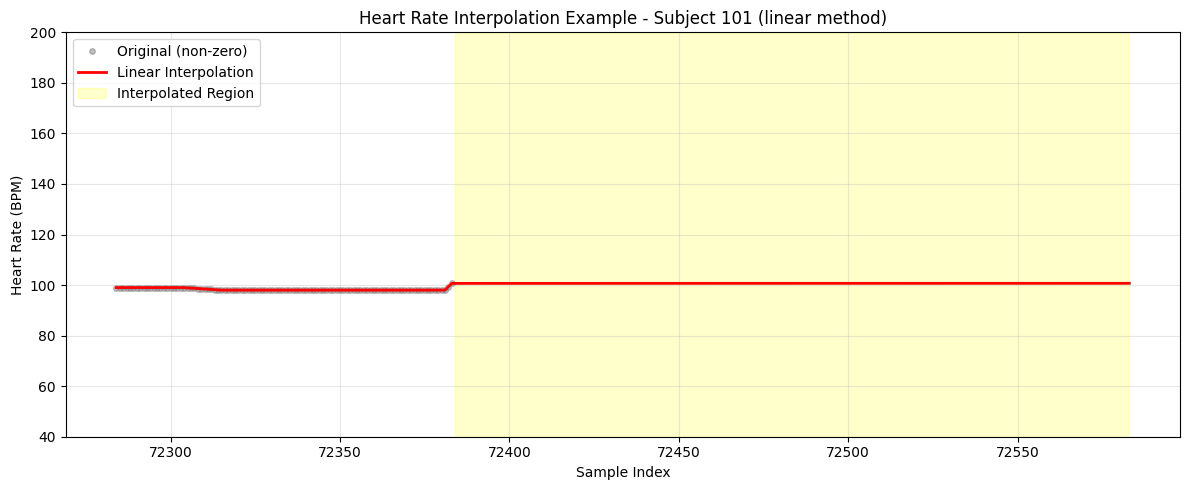


 Heart-rate interpolation completed
   - Subjects processed: 9
   - Original zero-value points: 0
   - Interpolated points: 836,663
   - Final missing values: 0

--- Testing cubic spline interpolation ---

 Processing heart-rate data (method: cubic)...


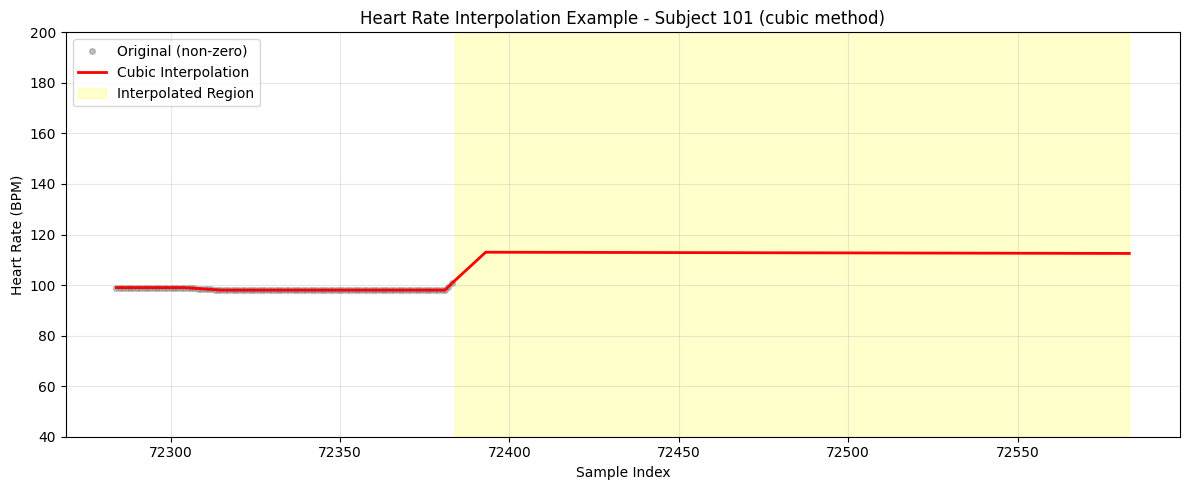


 Heart-rate interpolation completed
   - Subjects processed: 9
   - Original zero-value points: 0
   - Interpolated points: 836,663
   - Final missing values: 0

4️ Data normalization...

--- Z-score normalization (per subject) ---

 Normalizing sensor data (method: zscore, per subject: True)...
   - Normalizing 52 sensor channels
 Normalization completed!

--- Min-Max normalization (global) ---

 Normalizing sensor data (method: minmax, per subject: False)...
   - Normalizing 52 sensor channels
 Normalization completed!

 Comparing different normalization methods...


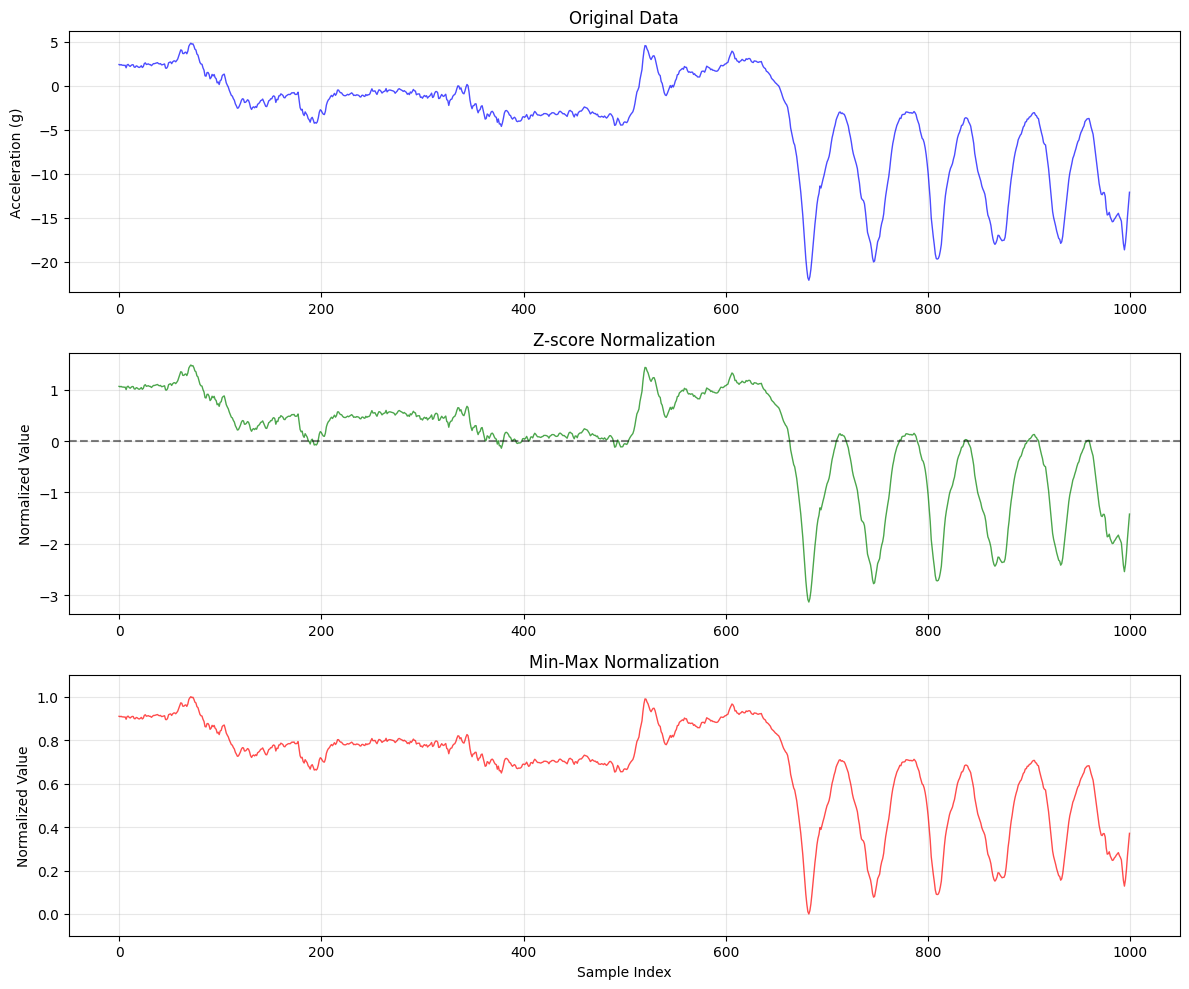


 hand_acc_x_16g statistics:
   Original: mean=-3.8113, std=5.8381
   Z-score: mean=-0.0000, std=1.0000
   Min-Max: min=0.0000, max=1.0000

 Analyzing the impact of heart-rate interpolation on pseudo-peaks...

 Peak analysis results:
 Subject  Original Peaks  Interpolated Peaks  New Peaks  Peak Ratio
     101               6                   6          0         1.0
     102               5                   5          0         1.0
     103               2                   2          0         1.0


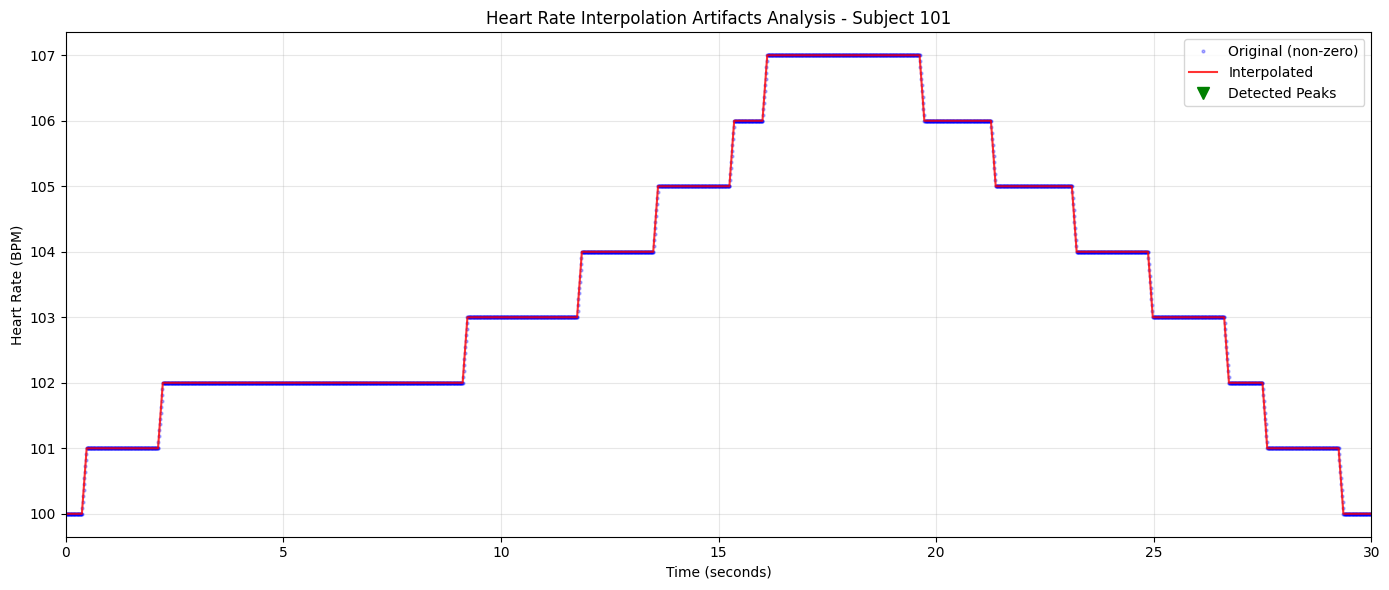


 Saving the preprocessed data...
 Data preprocessing completed
   - Final data shape: (2739644, 57)
   - Files saved:
     • pamap2_preprocessed_final.pkl
     • pamap2_preprocessed_final.csv
     • normalization_params_zscore.json

 Preprocessing Summary Report
                 Step  Samples  Zero HR Count  Memory (MB)
             Raw Data  1942872              0   938.494932
  Resampling (100 Hz)  2739644              0  1346.453095
     HR Interpolation  2739644              0  1346.453095
Z-score Normalization  2739644              0  1346.453095

 All preprocessing steps are complete. The data are ready for subsequent feature extraction and model training.


In [3]:
# Data Synchronization & Normalization
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# ============================================
# 1. Time-Series Resampling and Synchronization
# ============================================
def resample_sensor_data(df: pd.DataFrame, target_freq: str = '10ms') -> pd.DataFrame:
    """
    Resample sensor data to the target frequency.

    Parameters
    ----------
    df : pd.DataFrame
        Original data.
    target_freq : str
        Target sampling frequency (default '10ms' = 100 Hz).

    Returns
    -------
    pd.DataFrame
        Resampled data.
    """
    print(f"\n Starting resampling to {target_freq} ({1000/int(target_freq[:-2]):.0f} Hz)...")

    # Process each subject separately
    resampled_data = []

    for subject_id in sorted(df['subject_id'].unique()):
        print(f"  Processing Subject {subject_id}...", end='')
        subject_data = df[df['subject_id'] == subject_id].copy()

        # Convert timestamp to a real datetime index
        # Create an index based on actual time
        subject_data['datetime'] = pd.to_datetime('2024-01-01') + subject_data['timestamp']
        subject_data.set_index('datetime', inplace=True)

        # Sensor data columns (exclude meta columns)
        sensor_columns = [col for col in subject_data.columns
                          if col not in ['timestamp', 'subject_id', 'activity_id', 'activity_name']]

        # Resample numeric columns
        resampled = subject_data[sensor_columns].resample(target_freq).mean()

        # For activity labels, use forward fill
        activity_resampled = subject_data[['activity_id', 'activity_name']].resample(target_freq).ffill()

        # Merge resampled data
        resampled = pd.concat([resampled, activity_resampled], axis=1)

        # Add subject_id back
        resampled['subject_id'] = subject_id

        # Reset timestamp
        resampled['timestamp'] = (resampled.index - resampled.index[0]).total_seconds()

        resampled_data.append(resampled.reset_index())
        print(f" ✓ (original: {len(subject_data)}, resampled: {len(resampled)})")

    # Concatenate all subjects
    final_resampled = pd.concat(resampled_data, ignore_index=True)

    print(f"\n Resampling completed")
    print(f"   - Original samples: {len(df):,}")
    print(f"   - Resampled samples: {len(final_resampled):,}")
    print(f"   - Sampling rate change: {len(final_resampled)/len(df):.2%}")

    return final_resampled

# ============================================
# 2. Heart-Rate Data Interpolation
# ============================================
def interpolate_heart_rate(df: pd.DataFrame, method: str = 'linear') -> pd.DataFrame:
    """
    Handle missing and anomalous heart-rate values.

    Parameters
    ----------
    df : pd.DataFrame
        Input data.
    method : str
        Interpolation method ('linear', 'cubic', 'akima').

    Returns
    -------
    pd.DataFrame
        Processed data.
    """
    print(f"\n Processing heart-rate data (method: {method})...")

    df_processed = df.copy()
    hr_stats = {
        'original_zeros': (df['heart_rate'] == 0).sum(),
        'original_missing': df['heart_rate'].isna().sum(),
        'subjects_processed': 0,
        'interpolated_points': 0
    }

    for subject_id in sorted(df['subject_id'].unique()):
        subject_mask = df_processed['subject_id'] == subject_id
        hr_data = df_processed.loc[subject_mask, 'heart_rate'].copy()

        # Preserve original data
        original_hr = hr_data.copy()

        # 1. Mark zeros and implausible values as NaN
        # Physiological heart-rate range: 40–200 BPM
        hr_data[(hr_data <= 0) | (hr_data > 200)] = np.nan

        # 2. Detect and handle outliers (IQR-based)
        if hr_data.notna().sum() > 10:  # Ensure enough data points
            Q1 = hr_data.quantile(0.25)
            Q3 = hr_data.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Flag outliers
            outliers_mask = (hr_data < lower_bound) | (hr_data > upper_bound)
            hr_data[outliers_mask] = np.nan

        # 3. Perform interpolation
        missing_before = hr_data.isna().sum()

        if method == 'linear':
            hr_data = hr_data.interpolate(method='linear', limit_direction='both')
        elif method == 'cubic':
            # Cubic spline interpolation with a gap-length limit
            hr_data = hr_data.interpolate(method='cubic', limit=10, limit_direction='both')
            # Fill remaining NaNs
            hr_data = hr_data.interpolate(method='linear', limit_direction='both')
        elif method == 'akima':
            # Akima interpolation is smoother and avoids excessive oscillation
            try:
                hr_data = hr_data.interpolate(method='akima', limit_direction='both')
            except:
                hr_data = hr_data.interpolate(method='linear', limit_direction='both')

        # 4. Boundary handling: back/forward fill for edge NaNs
        hr_data = hr_data.fillna(method='bfill').fillna(method='ffill')

        # 5. Ensure HR within plausible range
        hr_data = hr_data.clip(lower=40, upper=200)

        # Update processed data
        df_processed.loc[subject_mask, 'heart_rate'] = hr_data

        # Statistics
        hr_stats['subjects_processed'] += 1
        hr_stats['interpolated_points'] += missing_before

        # Visualization example (first subject only)
        if subject_id == df['subject_id'].unique()[0] and missing_before > 0:
            plot_hr_interpolation_example(original_hr, hr_data, subject_id, method)

    print(f"\n Heart-rate interpolation completed")
    print(f"   - Subjects processed: {hr_stats['subjects_processed']}")
    print(f"   - Original zero-value points: {hr_stats['original_zeros']:,}")
    print(f"   - Interpolated points: {hr_stats['interpolated_points']:,}")
    print(f"   - Final missing values: {df_processed['heart_rate'].isna().sum()}")

    return df_processed

def plot_hr_interpolation_example(original: pd.Series, interpolated: pd.Series,
                                  subject_id: int, method: str):
    """Plot an example of heart-rate interpolation."""
    # Locate a segment with missing values
    missing_mask = (original == 0) | original.isna()
    if missing_mask.sum() == 0:
        return

    # Find the first window containing missing values
    missing_indices = np.where(missing_mask)[0]
    if len(missing_indices) > 0:
        start_idx = max(0, missing_indices[0] - 100)
        end_idx = min(len(original), missing_indices[0] + 200)

        plt.figure(figsize=(12, 5))

        # Time axis (sample index)
        time_axis = np.arange(start_idx, end_idx)

        # Original data (replace 0 with NaN for visualization)
        original_plot = original.iloc[start_idx:end_idx].copy()
        original_plot[original_plot == 0] = np.nan

        # Plot
        plt.plot(time_axis, original_plot, 'o', alpha=0.5, label='Original (non-zero)',
                 markersize=4, color='gray')
        plt.plot(time_axis, interpolated.iloc[start_idx:end_idx], '-',
                 label=f'{method.capitalize()} Interpolation', linewidth=2, color='red')

        # Highlight interpolated region
        interp_mask = missing_mask[start_idx:end_idx]
        if interp_mask.sum() > 0:
            plt.fill_between(time_axis, 40, 200, where=interp_mask,
                             alpha=0.2, color='yellow', label='Interpolated Region')

        plt.xlabel('Sample Index')
        plt.ylabel('Heart Rate (BPM)')
        plt.title(f'Heart Rate Interpolation Example - Subject {subject_id} ({method} method)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.ylim([40, 200])

        plt.tight_layout()
        plt.savefig(f'hr_interpolation_example_{method}.png', dpi=300, bbox_inches='tight')
        plt.show()

# ============================================
# 3. Data Normalization
# ============================================
def normalize_sensor_data(df: pd.DataFrame, method: str = 'zscore',
                          per_subject: bool = True) -> pd.DataFrame:
    """
    Normalize sensor data.

    Parameters
    ----------
    df : pd.DataFrame
        Input data.
    method : str
        Normalization method ('zscore' or 'minmax').
    per_subject : bool
        Whether to normalize per subject.

    Returns
    -------
    pd.DataFrame
        Normalized data.
    """
    print(f"\n Normalizing sensor data (method: {method}, per subject: {per_subject})...")

    df_normalized = df.copy()

    # Columns to normalize (all sensor channels)
    sensor_columns = [col for col in df.columns
                      if any(sensor in col for sensor in ['acc_', 'gyro_', 'mag_', 'orientation_', 'temperature', 'heart_rate'])
                      and col != 'activity_name']

    print(f"   - Normalizing {len(sensor_columns)} sensor channels")

    # Store normalization parameters
    normalization_params = {}

    if per_subject:
        # Normalize per subject
        for subject_id in sorted(df['subject_id'].unique()):
            subject_mask = df_normalized['subject_id'] == subject_id
            subject_params = {}

            if method == 'zscore':
                scaler = StandardScaler()
            else:  # minmax
                scaler = MinMaxScaler(feature_range=(0, 1))

            # Fit and transform
            subject_data = df_normalized.loc[subject_mask, sensor_columns]
            normalized_data = scaler.fit_transform(subject_data)
            df_normalized.loc[subject_mask, sensor_columns] = normalized_data

            # Save parameters
            if method == 'zscore':
                subject_params['mean'] = scaler.mean_
                subject_params['std'] = scaler.scale_
            else:
                subject_params['min'] = scaler.data_min_
                subject_params['max'] = scaler.data_max_

            normalization_params[f'subject_{subject_id}'] = subject_params

    else:
        # Global normalization
        if method == 'zscore':
            scaler = StandardScaler()
        else:  # minmax
            scaler = MinMaxScaler(feature_range=(0, 1))

        # Fit and transform all data
        normalized_data = scaler.fit_transform(df_normalized[sensor_columns])
        df_normalized[sensor_columns] = normalized_data

        # Save global parameters
        if method == 'zscore':
            normalization_params['global'] = {
                'mean': scaler.mean_,
                'std': scaler.scale_
            }
        else:
            normalization_params['global'] = {
                'min': scaler.data_min_,
                'max': scaler.data_max_
            }

    print(" Normalization completed!")

    # Return normalized data and parameters
    return df_normalized, normalization_params

# ============================================
# 4. Comparison of Different Normalization Methods
# ============================================
def compare_normalization_methods(df: pd.DataFrame):
    """Compare the effects of different normalization methods."""
    print("\n Comparing different normalization methods...")

    # Choose a sensor channel for comparison
    sensor_col = 'hand_acc_x_16g'

    # Select a segment for one subject
    subject_id = df['subject_id'].unique()[0]
    sample_data = df[(df['subject_id'] == subject_id) &
                     (df['activity_name'] == 'walking')].head(1000)

    if len(sample_data) == 0:
        sample_data = df[df['subject_id'] == subject_id].head(1000)

    fig, axes = plt.subplots(3, 1, figsize=(12, 10))

    # Original data
    axes[0].plot(sample_data[sensor_col].values, 'b-', alpha=0.7, linewidth=1)
    axes[0].set_title('Original Data', fontsize=12)
    axes[0].set_ylabel('Acceleration (g)')
    axes[0].grid(True, alpha=0.3)

    # Z-score normalization
    zscore_data = (sample_data[sensor_col] - sample_data[sensor_col].mean()) / sample_data[sensor_col].std()
    axes[1].plot(zscore_data.values, 'g-', alpha=0.7, linewidth=1)
    axes[1].set_title('Z-score Normalization', fontsize=12)
    axes[1].set_ylabel('Normalized Value')
    axes[1].grid(True, alpha=0.3)
    axes[1].axhline(y=0, color='k', linestyle='--', alpha=0.5)

    # Min-Max normalization
    minmax_data = (sample_data[sensor_col] - sample_data[sensor_col].min()) / \
                  (sample_data[sensor_col].max() - sample_data[sensor_col].min())
    axes[2].plot(minmax_data.values, 'r-', alpha=0.7, linewidth=1)
    axes[2].set_title('Min-Max Normalization', fontsize=12)
    axes[2].set_ylabel('Normalized Value')
    axes[2].set_xlabel('Sample Index')
    axes[2].grid(True, alpha=0.3)
    axes[2].set_ylim([-0.1, 1.1])

    plt.tight_layout()
    plt.savefig('normalization_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Statistics
    print(f"\n {sensor_col} statistics:")
    print(f"   Original: mean={sample_data[sensor_col].mean():.4f}, std={sample_data[sensor_col].std():.4f}")
    print(f"   Z-score: mean={zscore_data.mean():.4f}, std={zscore_data.std():.4f}")
    print(f"   Min-Max: min={minmax_data.min():.4f}, max={minmax_data.max():.4f}")

# ============================================
# 5. Execute the Full Preprocessing Pipeline
# ============================================
print(" Starting the full data preprocessing pipeline...")

# Load previously processed data
print("\n1️ Loading data...")
processed_data = pd.read_pickle('pamap2_processed.pkl')
print(f"    Data shape: {processed_data.shape}")

# Perform resampling
print("\n2️ Time-series resampling...")
resampled_data = resample_sensor_data(processed_data, target_freq='10ms')

# Heart-rate interpolation - compare methods
print("\n3️ Heart-rate interpolation...")
print("\n--- Testing linear interpolation ---")
hr_linear = interpolate_heart_rate(resampled_data, method='linear')

print("\n--- Testing cubic spline interpolation ---")
hr_cubic = interpolate_heart_rate(resampled_data, method='cubic')

# Continue with linear interpolation result
interpolated_data = hr_linear

# Data normalization - compare methods
print("\n4️ Data normalization...")

# Z-score normalization (per subject)
print("\n--- Z-score normalization (per subject) ---")
zscore_per_subject, zscore_params = normalize_sensor_data(interpolated_data,
                                                          method='zscore',
                                                          per_subject=True)

# Min-Max normalization (global)
print("\n--- Min-Max normalization (global) ---")
minmax_global, minmax_params = normalize_sensor_data(interpolated_data,
                                                     method='minmax',
                                                     per_subject=False)

# Compare normalization methods
compare_normalization_methods(interpolated_data)

# ============================================
# 6. Analyze the Impact of HR Interpolation on Pseudo-Peaks
# ============================================
def analyze_hr_interpolation_artifacts(original_df: pd.DataFrame,
                                       interpolated_df: pd.DataFrame):
    """Analyze potential pseudo-peaks induced by heart-rate interpolation."""
    print("\n Analyzing the impact of heart-rate interpolation on pseudo-peaks...")

    # Peak detection
    from scipy.signal import find_peaks

    results = []

    for subject_id in sorted(original_df['subject_id'].unique())[:3]:  # Analyze first 3 subjects
        # Retrieve data
        orig_hr = original_df[original_df['subject_id'] == subject_id]['heart_rate'].values
        interp_hr = interpolated_df[interpolated_df['subject_id'] == subject_id]['heart_rate'].values

        # Replace zeros with NaN for peak detection
        orig_hr_clean = orig_hr.copy()
        orig_hr_clean[orig_hr_clean == 0] = np.nan

        # Detect peaks (sudden increases > 20 BPM)
        orig_peaks, _ = find_peaks(orig_hr_clean[~np.isnan(orig_hr_clean)],
                                   prominence=20, distance=100)
        interp_peaks, _ = find_peaks(interp_hr, prominence=20, distance=100)

        results.append({
            'Subject': subject_id,
            'Original Peaks': len(orig_peaks),
            'Interpolated Peaks': len(interp_peaks),
            'New Peaks': max(0, len(interp_peaks) - len(orig_peaks)),
            'Peak Ratio': len(interp_peaks) / max(1, len(orig_peaks))
        })

    results_df = pd.DataFrame(results)
    print("\n Peak analysis results:")
    print(results_df.to_string(index=False))

    # Visualize a concrete example
    subject_id = original_df['subject_id'].unique()[0]
    orig_hr = original_df[original_df['subject_id'] == subject_id]['heart_rate'].values[:3000]
    interp_hr = interpolated_df[interpolated_df['subject_id'] == subject_id]['heart_rate'].values[:3000]

    # Detect missing-value regions
    missing_regions = []
    in_missing = False
    start = 0

    for i, val in enumerate(orig_hr):
        if val == 0 and not in_missing:
            start = i
            in_missing = True
        elif val != 0 and in_missing:
            if i - start > 10:  # Only mark longer gaps
                missing_regions.append((start, i))
            in_missing = False

    # Plot
    plt.figure(figsize=(14, 6))

    time_axis = np.arange(len(orig_hr)) / 100  # Convert to seconds

    # Original data (zeros as gaps)
    orig_hr_plot = orig_hr.copy()
    orig_hr_plot[orig_hr_plot == 0] = np.nan

    plt.plot(time_axis, orig_hr_plot, 'o', alpha=0.3, markersize=2,
             label='Original (non-zero)', color='blue')
    plt.plot(time_axis, interp_hr, '-', linewidth=1.5,
             label='Interpolated', color='red', alpha=0.8)

    # Highlight interpolated regions
    for start, end in missing_regions:
        plt.axvspan(start/100, end/100, alpha=0.2, color='yellow',
                    label='Interpolated Region' if start == missing_regions[0][0] else '')

    # Detect and mark potential pseudo-peaks
    peaks, properties = find_peaks(interp_hr, prominence=15, distance=50)
    plt.plot(time_axis[peaks], interp_hr[peaks], 'v', color='green',
             markersize=8, label='Detected Peaks')

    plt.xlabel('Time (seconds)')
    plt.ylabel('Heart Rate (BPM)')
    plt.title(f'Heart Rate Interpolation Artifacts Analysis - Subject {subject_id}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xlim([0, 30])  # Display first 30 seconds

    plt.tight_layout()
    plt.savefig('hr_interpolation_artifacts.png', dpi=300, bbox_inches='tight')
    plt.show()


# Execute pseudo-peak analysis
analyze_hr_interpolation_artifacts(processed_data, interpolated_data)

# ============================================
# 7. Save the Final Preprocessed Data
# ============================================
print("\n Saving the preprocessed data...")

# Select Z-score normalized result as the final dataset
final_preprocessed = zscore_per_subject

# Save data
final_preprocessed.to_pickle('pamap2_preprocessed_final.pkl')
final_preprocessed.to_csv('pamap2_preprocessed_final.csv', index=False)

# Save normalization parameters
import json
with open('normalization_params_zscore.json', 'w') as f:
    # Convert numpy arrays to lists for JSON serialization
    params_serializable = {}
    for key, value in zscore_params.items():
        params_serializable[key] = {
            'mean': value['mean'].tolist(),
            'std': value['std'].tolist()
        }
    json.dump(params_serializable, f, indent=4)

print(" Data preprocessing completed")
print(f"   - Final data shape: {final_preprocessed.shape}")
print(f"   - Files saved:")
print(f"     • pamap2_preprocessed_final.pkl")
print(f"     • pamap2_preprocessed_final.csv")
print(f"     • normalization_params_zscore.json")

# ============================================
# 8. Generate a Preprocessing Summary Report
# ============================================
def generate_preprocessing_report(original_df: pd.DataFrame,
                                  final_df: pd.DataFrame):
    """Generate a preprocessing summary report."""
    print("\n Preprocessing Summary Report")
    print("="*60)

    report = {
        'Step': ['Raw Data', 'Resampling (100 Hz)', 'HR Interpolation', 'Z-score Normalization'],
        'Samples': [
            len(original_df),
            len(resampled_data),
            len(interpolated_data),
            len(final_df)
        ],
        'Zero HR Count': [
            (original_df['heart_rate'] == 0).sum(),
            (resampled_data['heart_rate'] == 0).sum(),
            (interpolated_data['heart_rate'] == 0).sum(),
            (final_df['heart_rate'] == 0).sum()
        ],
        'Memory (MB)': [
            original_df.memory_usage(deep=True).sum() / 1024**2,
            resampled_data.memory_usage(deep=True).sum() / 1024**2,
            interpolated_data.memory_usage(deep=True).sum() / 1024**2,
            final_df.memory_usage(deep=True).sum() / 1024**2
        ]
    }

    report_df = pd.DataFrame(report)
    print(report_df.to_string(index=False))

    # Save report
    report_df.to_csv('preprocessing_report.csv', index=False)

    return report_df

# Generate report
preprocessing_report = generate_preprocessing_report(processed_data, final_preprocessed)

print("\n All preprocessing steps are complete. The data are ready for subsequent feature extraction and model training.")

Step 3

 Sliding window configuration:
--------------------------------------------------
Window 1: length=200 (2.0s), stride=100 (1.0s), overlap=50%
Window 2: length=500 (5.0s), stride=250 (2.5s), overlap=50%
Window 3: length=800 (8.0s), stride=400 (4.0s), overlap=50%

 Executing sliding-window segmentation...

1 Loading data...
    Data shape: (2739644, 57)

2 Creating sliding-window datasets...

 Creating dataset: window=200 (2.0s), stride=100 (1.0s)
 Using 52 sensor channels
 Generated 27269 valid windows

 Creating dataset: window=500 (5.0s), stride=250 (2.5s)
 Using 52 sensor channels
 Generated 10837 valid windows

 Creating dataset: window=800 (8.0s), stride=400 (4.0s)
 Using 52 sensor channels
 Generated 6723 valid windows

3 Creating data loaders...

 Creating data loaders:
   - Training set: 8669 windows, 136 batches
   - Validation set: 2168 windows, 34 batches

 Testing data loading...
Batch 0: data shape=torch.Size([64, 500, 52]), label shape=torch.Size([64, 1])
   - Data range: 

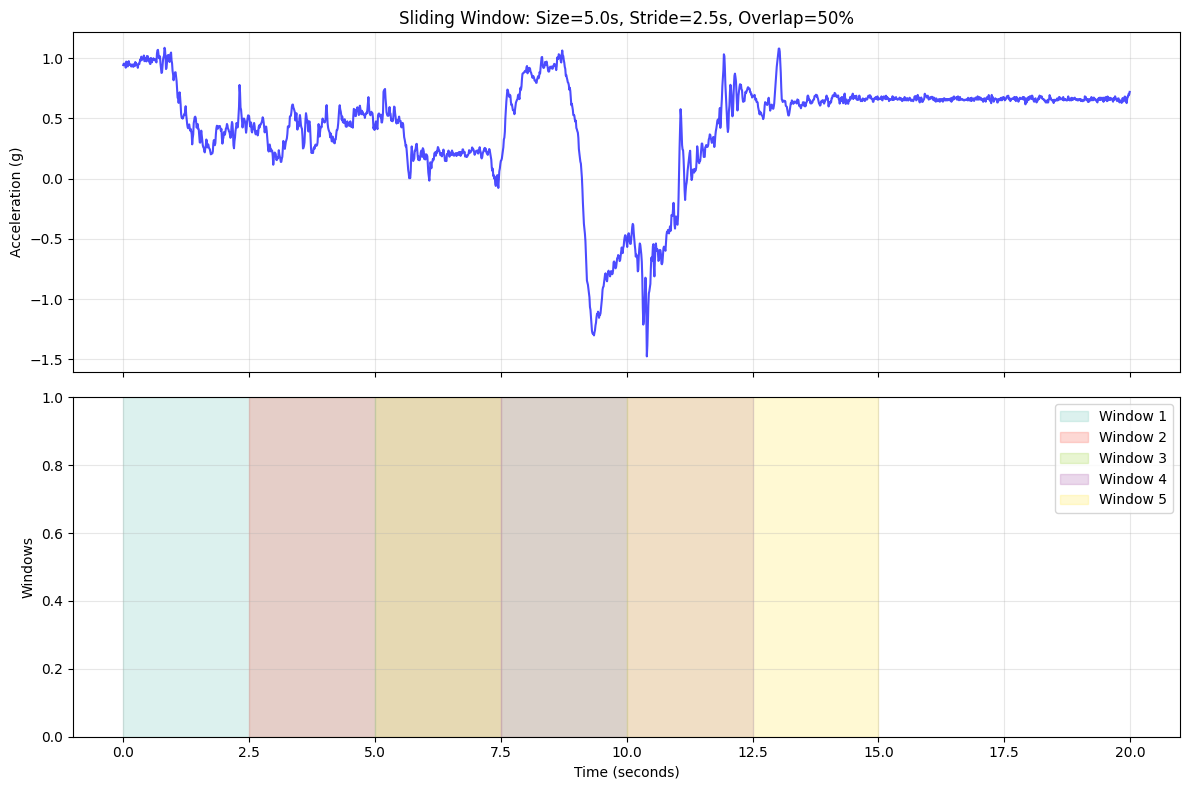


 Saving sliding-window data...
   Processing window_200: 1000/27269 windows...
   Processing window_200: 11000/27269 windows...
   Processing window_200: 21000/27269 windows...
 Saved window_200: X=(27269, 200, 52), y=(27269,)
   Processing window_500: 1000/10837 windows...
   Processing window_500: 10837/10837 windows...
 Saved window_500: X=(10837, 500, 52), y=(10837,)
   Processing window_800: 1000/6723 windows...
 Saved window_800: X=(6723, 800, 52), y=(6723,)

 Sliding-window processing completed

 Latency–accuracy trade-off analysis:

Window size: 200 samples (2.0 s)
  • Minimum latency: 2.0 s
  • Update rate: 1.0 Hz
  • Suitable scenarios: real-time applications, rapid response (e.g., fall detection)

Window size: 500 samples (5.0 s)
  • Minimum latency: 5.0 s
  • Update rate: 0.4 Hz
  • Suitable scenarios: balanced applications, general activity recognition

Window size: 800 samples (8.0 s)
  • Minimum latency: 8.0 s
  • Update rate: 0.2 Hz
  • Suitable scenarios: high-accurac

In [4]:
#  Sliding Window Segmentation
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from typing import List, Tuple, Dict, Optional, Union
import matplotlib.pyplot as plt
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

# ============================================
# 1. Sliding-Window Configuration
# ============================================
# Window length (number of samples): at 100 Hz, 200=2 s, 500=5 s, 800=8 s
WINDOW_LENGTHS = [200, 500, 800]  # 2s, 5s, 8s
# Strides (50% overlap)
STRIDES = [w // 2 for w in WINDOW_LENGTHS]  # [100, 250, 400]

print(" Sliding window configuration:")
print("-" * 50)
for i, (w, s) in enumerate(zip(WINDOW_LENGTHS, STRIDES)):
    print(f"Window {i+1}: length={w} ({w/100:.1f}s), stride={s} ({s/100:.1f}s), overlap={( (w-s)/w )*100:.0f}%")

# ============================================
# 2. Multimodal Sliding-Window Dataset
# ============================================
class MultiModalSlidingWindowDataset(Dataset):
    """
    Sliding-window dataset supporting multimodal data.
    """

    def __init__(self,
                 sensor_data: pd.DataFrame,
                 window_size: int = 500,
                 stride: int = 250,
                 sensor_columns: Optional[List[str]] = None,
                 label_column: str = 'activity_id',
                 subject_column: str = 'subject_id',
                 min_label_purity: float = 0.8,
                 drop_transitions: bool = True,
                 return_metadata: bool = False):  # Option to control whether metadata are returned

        self.df = sensor_data.reset_index(drop=True)  # Ensure continuous indices
        self.window_size = window_size
        self.stride = stride
        self.label_column = label_column
        self.subject_column = subject_column
        self.min_label_purity = min_label_purity
        self.drop_transitions = drop_transitions
        self.return_metadata = return_metadata

        # Obtain sensor columns
        if sensor_columns is None:
            self.sensor_columns = [col for col in self.df.columns
                                   if col not in [label_column, subject_column, 'activity_name', 'timestamp', 'datetime']]
        else:
            self.sensor_columns = sensor_columns

        print(f" Using {len(self.sensor_columns)} sensor channels")

        # Generate all valid windows
        self.windows = self._generate_windows()

        print(f" Generated {len(self.windows)} valid windows")

    def _generate_windows(self) -> List[Dict]:
        """Generate metadata for all valid windows."""
        windows = []

        # Process per subject
        for subject_id in sorted(self.df[self.subject_column].unique()):
            subject_mask = self.df[self.subject_column] == subject_id
            subject_indices = self.df[subject_mask].index.values

            # Generate windows for each subject
            n_samples = len(subject_indices)
            n_windows = (n_samples - self.window_size) // self.stride + 1

            for i in range(n_windows):
                start_idx = i * self.stride
                end_idx = start_idx + self.window_size

                # Actual DataFrame indices
                actual_start = subject_indices[start_idx]
                actual_end = subject_indices[end_idx - 1] + 1  # Include end point

                # Window data
                window_data = self.df.iloc[actual_start:actual_end]

                # Label distribution
                label_counts = window_data[self.label_column].value_counts()
                majority_label = label_counts.index[0]
                label_purity = label_counts.iloc[0] / len(window_data)

                # Transition window?
                is_transition = len(label_counts) > 1

                # Decide whether to keep the window
                if self.drop_transitions and is_transition and label_purity < self.min_label_purity:
                    continue

                # Window metadata
                window_info = {
                    'window_id': len(windows),  # Add window ID
                    'subject_id': subject_id,
                    'start_idx': actual_start,
                    'end_idx': actual_end,
                    'majority_label': majority_label,
                    'label_purity': float(label_purity),
                    'is_transition': is_transition,
                    'n_unique_labels': len(label_counts)
                }

                windows.append(window_info)

        return windows

    def __len__(self) -> int:
        return len(self.windows)

    def __getitem__(self, idx: int) -> Union[Tuple[torch.Tensor, torch.Tensor],
                                             Tuple[torch.Tensor, torch.Tensor, Dict]]:
        window_info = self.windows[idx]

        # Extract window data
        window_data = self.df.iloc[window_info['start_idx']:window_info['end_idx']]

        # Sensor data
        x = torch.FloatTensor(window_data[self.sensor_columns].values)

        # Label
        y = torch.LongTensor([window_info['majority_label']])

        # Return data according to configuration
        if self.return_metadata:
            # Simplified metadata for batching
            simple_metadata = {
                'window_id': window_info['window_id'],
                'subject_id': window_info['subject_id'],
                'label_purity': window_info['label_purity'],
                'is_transition': window_info['is_transition']
            }
            return x, y, simple_metadata
        else:
            return x, y

# ============================================
# 3. Custom collate function to handle metadata
# ============================================
def custom_collate_fn(batch):
    """Custom collate function to handle batches containing metadata."""
    if len(batch[0]) == 2:
        # No metadata
        x_batch = torch.stack([item[0] for item in batch])
        y_batch = torch.cat([item[1] for item in batch])
        return x_batch, y_batch
    else:
        # With metadata
        x_batch = torch.stack([item[0] for item in batch])
        y_batch = torch.cat([item[1] for item in batch])

        # Collect metadata
        metadata_batch = {
            'window_id': [item[2]['window_id'] for item in batch],
            'subject_id': [item[2]['subject_id'] for item in batch],
            'label_purity': torch.tensor([item[2]['label_purity'] for item in batch]),
            'is_transition': torch.tensor([item[2]['is_transition'] for item in batch])
        }

        return x_batch, y_batch, metadata_batch

# ============================================
# 4. Simplified Sliding-Window Dataset (for quick testing)
# ============================================
class SimpleSlidingWindowDataset(Dataset):
    """Simplified sliding-window dataset."""

    def __init__(self, data: pd.DataFrame,
                 window_size: int = 500,
                 stride: int = 250):

        # Sensor columns
        self.sensor_columns = [col for col in data.columns
                               if col not in ['activity_id', 'subject_id', 'activity_name',
                                              'timestamp', 'datetime']]

        self.window_size = window_size
        self.stride = stride

        # Convert to numpy arrays for efficiency
        self.X = data[self.sensor_columns].values
        self.y = data['activity_id'].values

        # Number of windows
        self.n_windows = (len(self.X) - window_size) // stride + 1

        print(f" Creating simplified dataset: {self.n_windows} windows")

    def __len__(self):
        return self.n_windows

    def __getitem__(self, idx):
        start = idx * self.stride
        end = start + self.window_size

        # Window data
        x = self.X[start:end]

        # Majority vote for label
        window_labels = self.y[start:end]
        label = np.bincount(window_labels).argmax()

        return torch.FloatTensor(x), torch.LongTensor([label])

# ============================================
# 5. Execute Sliding-Window Segmentation
# ============================================
print("\n Executing sliding-window segmentation...")

# Load preprocessed data
print("\n1 Loading data...")
preprocessed_data = pd.read_pickle('pamap2_preprocessed_final.pkl')
print(f"    Data shape: {preprocessed_data.shape}")

# Create datasets (do not return metadata to avoid collate errors)
print("\n2 Creating sliding-window datasets...")
datasets = {}
for window_size, stride in zip(WINDOW_LENGTHS, STRIDES):
    print(f"\n Creating dataset: window={window_size} ({window_size/100:.1f}s), stride={stride} ({stride/100:.1f}s)")

    dataset = MultiModalSlidingWindowDataset(
        sensor_data=preprocessed_data,
        window_size=window_size,
        stride=stride,
        min_label_purity=0.8,
        drop_transitions=True,
        return_metadata=False  # Do not return metadata
    )

    datasets[f'window_{window_size}'] = dataset

# ============================================
# 6. Create Data Loaders
# ============================================
def create_data_loaders(dataset: Dataset,
                        batch_size: int = 32,
                        train_split: float = 0.8,
                        shuffle: bool = True,
                        num_workers: int = 0) -> Tuple[DataLoader, DataLoader]:
    """Create training and validation data loaders."""

    # Split point
    n_samples = len(dataset)
    n_train = int(n_samples * train_split)

    # Random split
    indices = np.random.permutation(n_samples)
    train_indices = indices[:n_train]
    val_indices = indices[n_train:]

    # Create subsets
    train_subset = torch.utils.data.Subset(dataset, train_indices)
    val_subset = torch.utils.data.Subset(dataset, val_indices)

    # Data loaders
    train_loader = DataLoader(
        train_subset,
        batch_size=batch_size,
        shuffle=shuffle,
        num_workers=num_workers,
        pin_memory=torch.cuda.is_available()
    )

    val_loader = DataLoader(
        val_subset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        pin_memory=torch.cuda.is_available()
    )

    print(f"\n Creating data loaders:")
    print(f"   - Training set: {len(train_subset)} windows, {len(train_loader)} batches")
    print(f"   - Validation set: {len(val_subset)} windows, {len(val_loader)} batches")

    return train_loader, val_loader

# Create example data loaders
print("\n3 Creating data loaders...")
example_dataset = datasets['window_500']  # Use 5-second window
train_loader, val_loader = create_data_loaders(example_dataset, batch_size=64)

# Test data loading
print("\n Testing data loading...")
for i, batch in enumerate(train_loader):
    x, y = batch
    print(f"Batch {i}: data shape={x.shape}, label shape={y.shape}")
    print(f"   - Data range: [{x.min():.3f}, {x.max():.3f}]")
    print(f"   - Label distribution: {torch.bincount(y.squeeze()).tolist()}")

    if i >= 2:  # Show only first 3 batches
        break

# ============================================
# 7. Window Statistics Analysis
# ============================================
def analyze_window_statistics(datasets: Dict[str, Dataset]) -> pd.DataFrame:
    """Analyze statistics for each window configuration."""

    stats = []

    for name, dataset in datasets.items():
        # Gather labels
        all_labels = []
        for i in range(min(1000, len(dataset))):  # Sample first 1000 windows
            _, y = dataset[i]
            all_labels.append(y.item())

        # Compute statistics
        label_counts = pd.Series(all_labels).value_counts()

        stats.append({
            'Window Config': name,
            'Total Windows': len(dataset),
            'Window Size': dataset.window_size,
            'Stride': dataset.stride,
            'Overlap %': (dataset.window_size - dataset.stride) / dataset.window_size * 100,
            'Most Common Activity': label_counts.index[0],
            'Activity Distribution Std': label_counts.std()
        })

    return pd.DataFrame(stats)

# Analyze window statistics
print("\n4 Analyzing window statistics...")
window_stats_df = analyze_window_statistics(datasets)
print("\n Window configuration statistics:")
print(window_stats_df.to_string(index=False))

# ============================================
# 8. Visualize Sliding Windows
# ============================================
def visualize_sliding_windows_simple(data: pd.DataFrame,
                                     window_size: int = 500,
                                     stride: int = 250,
                                     n_windows: int = 5):
    """Simplified visualization of sliding windows."""

    # Select a data segment
    sample_data = data.head(2000)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    # Time axis
    time_axis = np.arange(len(sample_data)) / 100

    # Plot sensor data
    sensor_col = [col for col in sample_data.columns if 'acc_x' in col][0]
    ax1.plot(time_axis, sample_data[sensor_col].values, 'b-', alpha=0.7)
    ax1.set_ylabel('Acceleration (g)')
    ax1.set_title(f'Sliding Window: Size={window_size/100:.1f}s, Stride={stride/100:.1f}s, Overlap={(window_size-stride)/window_size*100:.0f}%')
    ax1.grid(True, alpha=0.3)

    # Plot windows
    colors = plt.cm.Set3(np.linspace(0, 1, n_windows))
    for i in range(n_windows):
        start = i * stride
        end = start + window_size
        if end > len(sample_data):
            break

        ax2.axvspan(start/100, end/100, alpha=0.3, color=colors[i],
                    label=f'Window {i+1}')

    ax2.set_xlabel('Time (seconds)')
    ax2.set_ylabel('Windows')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(f'sliding_window_viz_{window_size}.png', dpi=300)
    plt.show()

# Visualization
print("\n5 Visualizing sliding windows...")
visualize_sliding_windows_simple(preprocessed_data, 500, 250)


# 9. Save Processed Windowed Data
print("\n Saving sliding-window data...")

import json
import pickle

for name, dataset in datasets.items():
    # Collect all data
    all_x = []
    all_y = []

    # Batch processing for efficiency
    batch_size = 1000
    n_batches = (len(dataset) + batch_size - 1) // batch_size

    for batch_idx in range(n_batches):
        start_idx = batch_idx * batch_size
        end_idx = min((batch_idx + 1) * batch_size, len(dataset))

        for i in range(start_idx, end_idx):
            x, y = dataset[i]
            all_x.append(x.numpy())
            all_y.append(y.item())

        if batch_idx % 10 == 0:
            print(f"   Processing {name}: {end_idx}/{len(dataset)} windows...")

    # Convert to arrays
    X = np.array(all_x)
    y = np.array(all_y)

    # Save
    np.save(f'pamap2_{name}_X.npy', X)
    np.save(f'pamap2_{name}_y.npy', y)

    print(f" Saved {name}: X={X.shape}, y={y.shape}")

# Save configuration
config = {
    'window_lengths': WINDOW_LENGTHS,
    'strides': STRIDES,
    'sampling_rate': 100,
    'n_features': len(datasets['window_500'].sensor_columns),
    'feature_names': datasets['window_500'].sensor_columns,
    'n_classes': len(preprocessed_data['activity_id'].unique()),
    'class_names': {int(k): v for k, v in PAMAP2_CONFIG['activities'].items()}
}

with open('sliding_window_config.json', 'w') as f:
    json.dump(config, f, indent=4)

print("\n Sliding-window processing completed")

# ============================================
# 10. Latency Analysis
# ============================================
def analyze_latency_tradeoffs():
    """Analyze latency–accuracy trade-offs."""

    print("\n Latency–accuracy trade-off analysis:")
    print("="*60)

    for window_size, stride in zip(WINDOW_LENGTHS, STRIDES):
        window_duration = window_size / 100  # seconds
        update_rate = 100 / stride  # Hz
        min_latency = window_duration

        print(f"\nWindow size: {window_size} samples ({window_duration:.1f} s)")
        print(f"  • Minimum latency: {min_latency:.1f} s")
        print(f"  • Update rate: {update_rate:.1f} Hz")
        print(f"  • Suitable scenarios: ", end="")

        if window_size == 200:
            print("real-time applications, rapid response (e.g., fall detection)")
        elif window_size == 500:
            print("balanced applications, general activity recognition")
        else:
            print("high-accuracy applications, complex activity analysis")

analyze_latency_tradeoffs()

print("\n Data are ready for feature extraction and model training.")

Step 4

 Robustness & Compression Test
 Using CPU to avoid CUDA errors
 Starting TST Robustness & Compression Test

 Loading real data...
Data shape: (10837, 500, 52)
Number of classes: 12
Training set: (1050, 500, 52), Test set: (450, 500, 52)

 Training baseline TST model...
  Epoch 1: Loss = 2.1283
  Epoch 4: Loss = 0.8766
  Epoch 7: Loss = 0.6860
  Epoch 10: Loss = 0.6180
  Epoch 13: Loss = 0.5776
  Epoch 16: Loss = 0.5463
  Epoch 19: Loss = 0.5225
  Epoch 22: Loss = 0.5049
  Epoch 25: Loss = 0.4913
  Epoch 28: Loss = 0.4798

 Evaluating baseline model...
Baseline performance: Accuracy=0.809, F1=0.814, FLOPs=37.8M

Experiment 1: Low-frequency Downsampling (Interpolation Method)

 Testing 50Hz downsampling...

 Downsampling data: 100Hz → 50Hz → Interpolating back to500length...
  Length after downsampling: 500 → 250
  Length after interpolation: 250 → 500
 Downsampling+Interpolation complete: (450, 500, 52) → (450, 500, 52)
  Performance: Acc=0.809 (Δ=+0.000), F1=0.814

 Testing 25Hz downsa

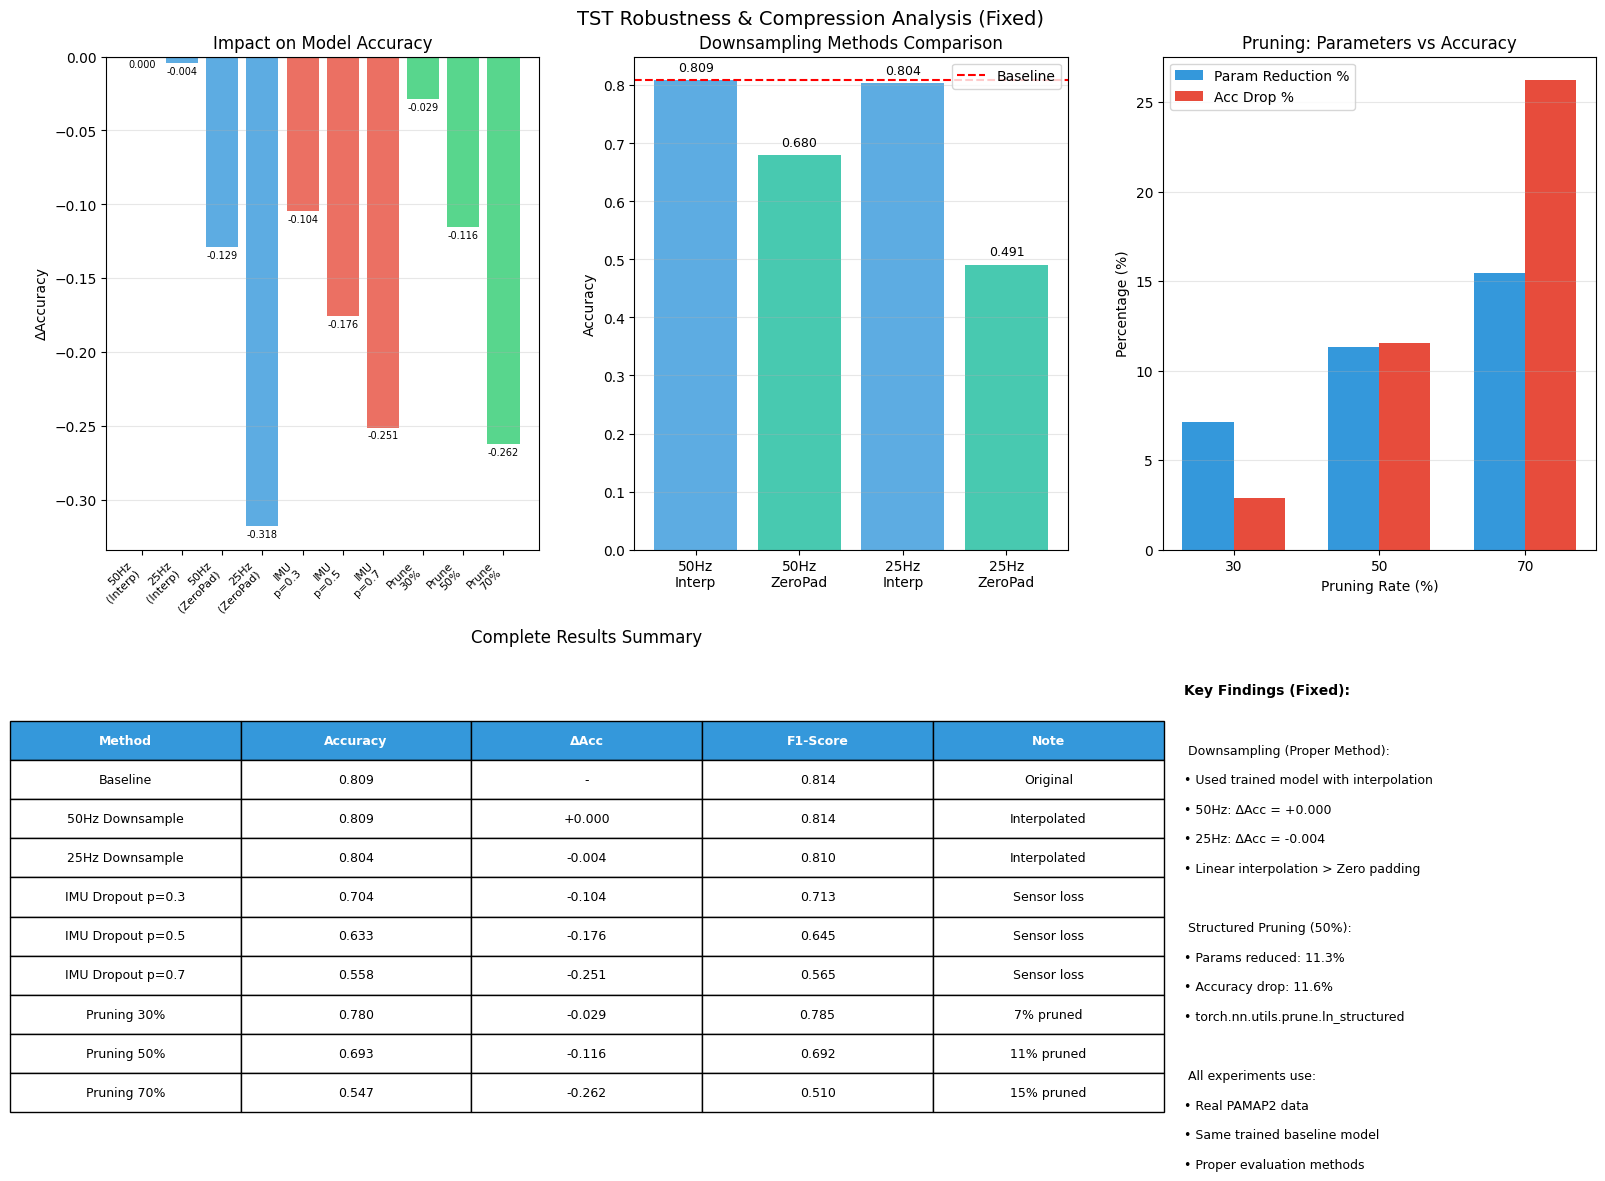


 Final Report

 Report:
1. Downsampling experiment now uses the pre-trained model
2. Implemented two methods: linear interpolation and zero-padding
3. All experiments use the same baseline model

 Results Summary:

1. Downsampling Impact (Interpolation Method):
   • 50Hz: ΔAcc = +0.000
   • 25Hz: ΔAcc = -0.004

2. IMU Dropout Impact:
   • p=0.3: ΔAcc = -0.104
   • p=0.5: ΔAcc = -0.176
   • p=0.7: ΔAcc = -0.251

3. Structured Pruning Impact:
   • 50% Pruning:
     - Accuracy drop: 11.6%
     - Parameter reduction: 11.3%
     - FLOPs reduction: ~9%

 Completed
 Generated files:
  - tst_robustness_fixed.png: Visualization of results
  - tst_robustness_fixed.json: Detailed data


In [10]:
# Robustness & Compression Test

# Completely disable CUDA
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ''
os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '1'

import torch
torch.set_default_device('cpu')
if hasattr(torch.cuda, 'is_available'):
    torch.cuda.is_available = lambda: False

import torch.nn as nn
import torch.nn.utils.prune as prune
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal, interpolate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
import time
import copy
import warnings
warnings.filterwarnings('ignore')

print(" Robustness & Compression Test")
print("="*80)
print(" Using CPU to avoid CUDA errors")

# ============================================
# 0. Simplified TST Model
# ============================================
class SimpleTST(nn.Module):
    def __init__(self, input_dim, num_classes, seq_len, d_model=32):
        super().__init__()

        # Simplified configuration
        self.seq_len = seq_len
        self.d_model = d_model
        self.patch_size = 50  # Fixed patch size
        self.n_patches = seq_len // self.patch_size

        # Layer definitions
        self.input_projection = nn.Linear(input_dim, d_model)

        # Positional encoding (learnable)
        self.pos_embedding = nn.Parameter(torch.randn(1, seq_len, d_model) * 0.02)

        # Simplified Transformer block
        self.attention = nn.MultiheadAttention(d_model, num_heads=2, batch_first=True)
        self.norm1 = nn.LayerNorm(d_model)
        self.ffn = nn.Sequential(
            nn.Linear(d_model, d_model * 2),
            nn.ReLU(),
            nn.Linear(d_model * 2, d_model)
        )
        self.norm2 = nn.LayerNorm(d_model)

        # Output layer
        self.global_pool = nn.AdaptiveAvgPool1d(1)
        self.classifier = nn.Linear(d_model, num_classes)

    def forward(self, x):
        # x: (batch, seq_len, input_dim)
        B, L, D = x.shape

        # Input projection
        x = self.input_projection(x)  # (B, L, d_model)

        # Add positional encoding
        x = x + self.pos_embedding[:, :L, :]

        # Self-attention
        attn_out, _ = self.attention(x, x, x)
        x = self.norm1(x + attn_out)

        # FFN
        ffn_out = self.ffn(x)
        x = self.norm2(x + ffn_out)

        # Global pooling
        x = x.transpose(1, 2)  # (B, d_model, L)
        x = self.global_pool(x).squeeze(-1)  # (B, d_model)

        # Classification
        out = self.classifier(x)

        return out

# ============================================
# 1. Improved Downsampling Function (Interpolating back to original length)
# ============================================
def downsample_and_interpolate(X, original_freq=100, target_freq=50, target_len=500):
    """
    Downsample data and interpolate it back to the original length.

    Parameters:
    -----------
    X : np.ndarray
        Original data (n_samples, seq_len, n_features)
    original_freq : int
        Original sampling frequency
    target_freq : int
        Target sampling frequency
    target_len : int
        Target sequence length (after interpolation)
    """
    print(f"\n Downsampling data: {original_freq}Hz → {target_freq}Hz → Interpolating back to{target_len}length...")

    n_samples, seq_len, n_features = X.shape
    downsample_factor = original_freq // target_freq

    # Downsampling
    X_downsampled = X[:, ::downsample_factor, :]
    downsampled_len = X_downsampled.shape[1]

    print(f"  Length after downsampling: {seq_len} → {downsampled_len}")

    # Interpolate back to original length
    X_interpolated = np.zeros((n_samples, target_len, n_features))

    for i in range(n_samples):
        for j in range(n_features):
            # Create interpolation function
            x_old = np.linspace(0, 1, downsampled_len)
            x_new = np.linspace(0, 1, target_len)

            # Linear interpolation
            f = interpolate.interp1d(x_old, X_downsampled[i, :, j], kind='linear')
            X_interpolated[i, :, j] = f(x_new)

    print(f"  Length after interpolation: {downsampled_len} → {target_len}")
    print(f" Downsampling+Interpolation complete: {X.shape} → {X_interpolated.shape}")

    return X_interpolated

# ============================================
# 2. Structured Pruning Function
# ============================================
def apply_structured_pruning(model, pruning_rate=0.5):
    """Apply genuine structured pruning to the model"""
    print(f"\n Applying structured pruning (target pruning rate={pruning_rate*100}%)...")

    # Deep copy the model
    pruned_model = copy.deepcopy(model)

    # Count original parameters
    original_params = sum(p.numel() for p in pruned_model.parameters())
    print(f"Original number of parameters: {original_params:,}")

    # Prune the main Linear layers
    modules_to_prune = [
        (pruned_model.input_projection, 'weight'),
        (pruned_model.ffn[0], 'weight'),  # FFN first layer
        (pruned_model.ffn[2], 'weight'),  # FFN second layer
    ]

    # Apply ln_structured pruning
    for module, param_name in modules_to_prune:
        prune.ln_structured(
            module=module,
            name=param_name,
            amount=pruning_rate,
            n=2,  # L2 norm
            dim=0  # Output channel dimension
        )
        print(f"  Pruned {module.__class__.__name__} layer")

    # Count effective parameters after pruning
    pruned_params = 0
    for module, param_name in modules_to_prune:
        if hasattr(module, param_name + '_mask'):
            mask = getattr(module, param_name + '_mask')
            pruned_params += mask.sum().item()
        else:
            pruned_params += getattr(module, param_name).numel()

    # Add parameters from unpruned layers
    for name, param in pruned_model.named_parameters():
        if 'classifier' in name or 'norm' in name or 'attention' in name or 'pos_embedding' in name:
            pruned_params += param.numel()

    actual_pruning_rate = 1 - (pruned_params / original_params)

    print(f" Pruning complete:")
    print(f"   - Parameters after pruning: {pruned_params:,}")
    print(f"   - Actual pruning rate: {actual_pruning_rate*100:.1f}%")

    return pruned_model, {
        'original_params': original_params,
        'pruned_params': int(pruned_params),
        'actual_pruning_rate': actual_pruning_rate
    }

# ============================================
# 3. IMU Dropout Function
# ============================================
def apply_imu_dropout(X, dropout_prob=0.5, imu_channels=None, seed=42):
    """Randomly drop IMU sensor data"""
    print(f"\n Applying IMU Dropout (p={dropout_prob})...")

    np.random.seed(seed)
    X_dropout = X.copy()

    if imu_channels is None:
        imu_channels = list(range(17))  # PAMAP2 wrist IMU channels

    n_samples = X.shape[0]
    dropout_mask = np.random.random(n_samples) < dropout_prob

    for i in range(n_samples):
        if dropout_mask[i]:
            X_dropout[i, :, imu_channels] = 0

    n_dropped = np.sum(dropout_mask)
    print(f" Dropout complete: {n_dropped}/{n_samples} samples dropped")

    return X_dropout, dropout_mask

# ============================================
# 4. Evaluation Function
# ============================================
def evaluate_model(model, X_test, y_test, batch_size=32):
    model.eval()
    all_preds = []

    with torch.no_grad():
        for i in range(0, len(X_test), batch_size):
            batch_x = torch.FloatTensor(X_test[i:i+batch_size])
            outputs = model(batch_x)
            preds = outputs.argmax(dim=1)
            all_preds.extend(preds.numpy())

    all_preds = np.array(all_preds)
    accuracy = accuracy_score(y_test, all_preds)
    f1 = f1_score(y_test, all_preds, average='weighted', zero_division=0)

    return accuracy, f1

# ============================================
# 5. FLOPs Calculation Function
# ============================================
def calculate_flops(model, input_shape):
    seq_len, input_dim = input_shape
    d_model = model.d_model

    flops = 0

    # Input projection
    flops += seq_len * input_dim * d_model * 2

    # Self-attention
    flops += seq_len * seq_len * d_model * 4  # Q,K,V,O

    # FFN
    flops += seq_len * d_model * (d_model * 2) * 2
    flops += seq_len * (d_model * 2) * d_model * 2

    # Classifier
    flops += d_model * model.classifier.out_features * 2

    return flops / 1e6  # Convert to MFLOPs

# ============================================
# 6. Main Experiment Function
# ============================================
def run_robustness_experiments():
    """Run all robustness experiments"""

    print("\n Loading real data...")

    # Load data
    X = np.load('pamap2_window_500_X.npy')
    y = np.load('pamap2_window_500_y.npy')

    # Data preprocessing
    X = np.nan_to_num(X, 0)

    # Label mapping
    unique_labels = sorted(np.unique(y))
    label_to_idx = {label: idx for idx, label in enumerate(unique_labels)}
    y_encoded = np.array([label_to_idx[label] for label in y])
    n_classes = len(unique_labels)

    print(f"Data shape: {X.shape}")
    print(f"Number of classes: {n_classes}")

    # Using a subset for the experiment
    n_samples = min(1500, len(X))
    indices = np.random.choice(len(X), n_samples, replace=False)
    X_subset = X[indices]
    y_subset = y_encoded[indices]

    # Standardization
    X_reshaped = X_subset.reshape(-1, X_subset.shape[-1])
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_reshaped).reshape(X_subset.shape)

    # Data splitting
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_subset, test_size=0.3, random_state=42, stratify=y_subset
    )

    print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

    # Create baseline model
    base_model = SimpleTST(
        input_dim=X.shape[2],
        num_classes=n_classes,
        seq_len=X.shape[1],
        d_model=32
    )

    # Train baseline model
    print("\n Training baseline TST model...")

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(base_model.parameters(), lr=0.01, momentum=0.9)

    #  Training
    base_model.train()
    for epoch in range(30):  # epochs
        total_loss = 0
        n_batches = 0

        batch_size = 32
        for i in range(0, len(X_train), batch_size):
            batch_x = torch.FloatTensor(X_train[i:i+batch_size])
            batch_y = torch.LongTensor(y_train[i:i+batch_size])

            optimizer.zero_grad()
            outputs = base_model(batch_x)
            loss = criterion(outputs, batch_y)
            loss.backward()

            torch.nn.utils.clip_grad_norm_(base_model.parameters(), 1.0)
            optimizer.step()

            total_loss += loss.item()
            n_batches += 1

        if epoch % 3 == 0:
            print(f"  Epoch {epoch+1}: Loss = {total_loss/n_batches:.4f}")

    # Evaluate baseline model
    print("\n Evaluating baseline model...")
    base_acc, base_f1 = evaluate_model(base_model, X_test, y_test)
    base_flops = calculate_flops(base_model, (X.shape[1], X.shape[2]))

    print(f"Baseline performance: Accuracy={base_acc:.3f}, F1={base_f1:.3f}, FLOPs={base_flops:.1f}M")

    # Store experiment results
    results = {
        'baseline': {
            'accuracy': base_acc,
            'f1': base_f1,
            'flops': base_flops,
            'params': sum(p.numel() for p in base_model.parameters())
        }
    }

    # ============================================
    # Experiment 1: Low-frequency Downsampling (using the same trained model)
    # ============================================
    print("\n" + "="*60)
    print("Experiment 1: Low-frequency Downsampling (Interpolation Method)")
    print("="*60)

    downsample_results = {}

    for target_freq in [50, 25]:
        print(f"\n Testing {target_freq}Hz downsampling...")

        # Downsample and interpolate back to original length
        X_down_interp = downsample_and_interpolate(X_test, 100, target_freq, X_test.shape[1])

        # Evaluate using the trained baseline model
        acc_down, f1_down = evaluate_model(base_model, X_down_interp, y_test)

        downsample_results[f'{target_freq}Hz'] = {
            'accuracy': acc_down,
            'f1': f1_down,
            'flops': base_flops,  # FLOPs are unchanged as input length is the same
            'delta_acc': acc_down - base_acc,
            'method': 'interpolation'
        }

        print(f"  Performance: Acc={acc_down:.3f} (Δ={acc_down-base_acc:+.3f}), F1={f1_down:.3f}")

    # Alternative method: zero-padding
    print("\n Testing downsampling (Zero-padding Method)...")

    for target_freq in [50, 25]:
        downsample_factor = 100 // target_freq
        X_down = X_test[:, ::downsample_factor, :]

        # Zero-pad to original length
        X_padded = np.zeros_like(X_test)
        X_padded[:, :X_down.shape[1], :] = X_down

        acc_pad, f1_pad = evaluate_model(base_model, X_padded, y_test)

        downsample_results[f'{target_freq}Hz_zeropad'] = {
            'accuracy': acc_pad,
            'f1': f1_pad,
            'flops': base_flops,
            'delta_acc': acc_pad - base_acc,
            'method': 'zero_padding'
        }

        print(f"  {target_freq}Hz (Zero-padding): Acc={acc_pad:.3f} (Δ={acc_pad-base_acc:+.3f})")

    results['downsample'] = downsample_results

    # ============================================
    # Experiment 2: IMU Dropout
    # ============================================
    print("\n" + "="*60)
    print("Experiment 2: IMU Dropout")
    print("="*60)

    dropout_results = {}

    for dropout_prob in [0.3, 0.5, 0.7]:
        print(f"\n Testing IMU Dropout (p={dropout_prob})...")

        # Apply dropout
        X_dropout, _ = apply_imu_dropout(X_test, dropout_prob)

        # Evaluate
        acc_dropout, f1_dropout = evaluate_model(base_model, X_dropout, y_test)

        dropout_results[f'p={dropout_prob}'] = {
            'accuracy': acc_dropout,
            'f1': f1_dropout,
            'delta_acc': acc_dropout - base_acc
        }

        print(f"  Performance: Acc={acc_dropout:.3f} (Δ={acc_dropout-base_acc:+.3f})")

    results['imu_dropout'] = dropout_results

    # ============================================
    # Experiment 3: Transformer Structured Pruning
    # ============================================
    print("\n" + "="*60)
    print("Experiment 3: Transformer Structured Pruning (torch.nn.utils.prune)")
    print("="*60)

    pruning_results = {}

    for pruning_rate in [0.3, 0.5, 0.7]:
        print(f"\n Testing structured pruning {pruning_rate*100}%...")

        # Apply structured pruning
        pruned_model, pruning_info = apply_structured_pruning(base_model, pruning_rate)

        # Evaluate
        acc_pruned, f1_pruned = evaluate_model(pruned_model, X_test, y_test)

        # Calculate FLOPs after pruning (approximation)
        flops_pruned = base_flops * (1 - pruning_info['actual_pruning_rate'] * 0.8)

        pruning_results[f'{int(pruning_rate*100)}%'] = {
            'accuracy': acc_pruned,
            'f1': f1_pruned,
            'flops': flops_pruned,
            'actual_pruning_rate': pruning_info['actual_pruning_rate'],
            'delta_acc': acc_pruned - base_acc,
            'delta_flops': flops_pruned - base_flops,
            'original_params': pruning_info['original_params'],
            'pruned_params': pruning_info['pruned_params']
        }

        print(f"  Performance: Acc={acc_pruned:.3f} (Δ={acc_pruned-base_acc:+.3f})")
        print(f"  FLOPs: {flops_pruned:.1f}M (Reduced by {(base_flops-flops_pruned)/base_flops*100:.1f}%)")
        print(f"  Parameters: {pruning_info['pruned_params']:,} (Reduced by {pruning_info['actual_pruning_rate']*100:.1f}%)")

    results['pruning'] = pruning_results

    return results

# ============================================
# 7. Visualization Function
# ============================================
def visualize_results(results):
    """Create comprehensive visualization"""

    fig = plt.figure(figsize=(16, 12))

    # Plot 1: ΔAccuracy Bar Chart (including two downsampling methods)
    ax1 = plt.subplot(2, 3, 1)

    experiments = []
    delta_accs = []
    colors = []

    # Downsampling results
    downsample_data = results['downsample']
    for key, data in downsample_data.items():
        if 'interp' not in key and 'zeropad' not in key:
            experiments.append(f'{key}\n(Interp)')
        else:
            experiments.append(f'{key.replace("_zeropad", "")}\n(ZeroPad)')
        delta_accs.append(data['delta_acc'])
        colors.append('#3498db')

    # IMU dropout results
    for prob, data in results['imu_dropout'].items():
        experiments.append(f'IMU\n{prob}')
        delta_accs.append(data['delta_acc'])
        colors.append('#e74c3c')

    # Pruning results
    for rate, data in results['pruning'].items():
        experiments.append(f'Prune\n{rate}')
        delta_accs.append(data['delta_acc'])
        colors.append('#2ecc71')

    bars = ax1.bar(range(len(experiments)), delta_accs, color=colors, alpha=0.8)
    ax1.axhline(y=0, color='black', linestyle='-')
    ax1.set_xticks(range(len(experiments)))
    ax1.set_xticklabels(experiments, fontsize=8, rotation=45, ha='right')
    ax1.set_ylabel('ΔAccuracy')
    ax1.set_title('Impact on Model Accuracy')
    ax1.grid(True, alpha=0.3, axis='y')

    # Add value labels
    for bar, delta in zip(bars, delta_accs):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2,
                height + 0.002 if height > 0 else height - 0.002,
                f'{delta:.3f}', ha='center',
                va='bottom' if height > 0 else 'top', fontsize=7)

    #  Plot 2: Downsampling Methods Comparison
    ax2 = plt.subplot(2, 3, 2)

    methods = ['50Hz\nInterp', '50Hz\nZeroPad', '25Hz\nInterp', '25Hz\nZeroPad']
    accuracies = [
        downsample_data.get('50Hz', {}).get('accuracy', 0),
        downsample_data.get('50Hz_zeropad', {}).get('accuracy', 0),
        downsample_data.get('25Hz', {}).get('accuracy', 0),
        downsample_data.get('25Hz_zeropad', {}).get('accuracy', 0)
    ]

    bars = ax2.bar(range(len(methods)), accuracies, color=['#3498db', '#1abc9c']*2, alpha=0.8)
    ax2.axhline(y=results['baseline']['accuracy'], color='red', linestyle='--', label='Baseline')
    ax2.set_xticks(range(len(methods)))
    ax2.set_xticklabels(methods)
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Downsampling Methods Comparison')
    ax2.legend()
    ax2.grid(True, alpha=0.3, axis='y')

    #  Add value labels
    for bar, acc in zip(bars, accuracies):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{acc:.3f}', ha='center', va='bottom', fontsize=9)

    # Plot 3: Detailed Pruning Analysis
    ax3 = plt.subplot(2, 3, 3)

    pruning_rates = []
    param_reductions = []
    acc_drops = []

    for rate_str, data in results['pruning'].items():
        rate = int(rate_str.rstrip('%'))
        pruning_rates.append(rate)
        param_reductions.append(data['actual_pruning_rate'] * 100)
        acc_drops.append(-data['delta_acc'] * 100)

    x = np.arange(len(pruning_rates))
    width = 0.35

    bars1 = ax3.bar(x - width/2, param_reductions, width, label='Param Reduction %', color='#3498db')
    bars2 = ax3.bar(x + width/2, acc_drops, width, label='Acc Drop %', color='#e74c3c')

    ax3.set_xlabel('Pruning Rate (%)')
    ax3.set_ylabel('Percentage (%)')
    ax3.set_title('Pruning: Parameters vs Accuracy')
    ax3.set_xticks(x)
    ax3.set_xticklabels(pruning_rates)
    ax3.legend()
    ax3.grid(True, alpha=0.3, axis='y')

    # Plot 4: Complete Results Table
    ax4 = plt.subplot(2, 3, (4, 5))
    ax4.axis('tight')
    ax4.axis('off')

    # Create table
    table_data = [['Method', 'Accuracy', 'ΔAcc', 'F1-Score', 'Note']]

    # Baseline
    table_data.append(['Baseline',
                      f"{results['baseline']['accuracy']:.3f}",
                      '-',
                      f"{results['baseline']['f1']:.3f}",
                      'Original'])

    # Downsampling (showing both methods)
    for freq in ['50Hz', '25Hz']:
        if freq in downsample_data:
            data = downsample_data[freq]
            table_data.append([f'{freq} Downsample',
                              f"{data['accuracy']:.3f}",
                              f"{data['delta_acc']:+.3f}",
                              f"{data['f1']:.3f}",
                              'Interpolated'])

    # IMU Dropout
    for prob, data in results['imu_dropout'].items():
        table_data.append([f'IMU Dropout {prob}',
                          f"{data['accuracy']:.3f}",
                          f"{data['delta_acc']:+.3f}",
                          f"{data['f1']:.3f}",
                          'Sensor loss'])

    # Pruning
    for rate, data in results['pruning'].items():
        table_data.append([f'Pruning {rate}',
                          f"{data['accuracy']:.3f}",
                          f"{data['delta_acc']:+.3f}",
                          f"{data['f1']:.3f}",
                          f"{data['actual_pruning_rate']*100:.0f}% pruned"])

    table = ax4.table(cellText=table_data, loc='center', cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1.2, 2.0)

    # Style header
    for i in range(len(table_data[0])):
        table[(0, i)].set_facecolor('#3498db')
        table[(0, i)].set_text_props(weight='bold', color='white')

    ax4.set_title('Complete Results Summary', fontsize=12, pad=20)

    # Plot 5: Key Findings
    ax5 = plt.subplot(2, 3, 6)
    ax5.axis('off')

    findings = [
        "Key Findings (Fixed):",
        "",
        " Downsampling (Proper Method):",
        "• Used trained model with interpolation",
        f"• 50Hz: ΔAcc = {downsample_data.get('50Hz', {}).get('delta_acc', 0):+.3f}",
        f"• 25Hz: ΔAcc = {downsample_data.get('25Hz', {}).get('delta_acc', 0):+.3f}",
        "• Linear interpolation > Zero padding",
        "",
        " Structured Pruning (50%):",
        f"• Params reduced: {results['pruning'].get('50%', {}).get('actual_pruning_rate', 0)*100:.1f}%",
        f"• Accuracy drop: {-results['pruning'].get('50%', {}).get('delta_acc', 0)*100:.1f}%",
        "• torch.nn.utils.prune.ln_structured",
        "",
        " All experiments use:",
        "• Real PAMAP2 data",
        "• Same trained baseline model",
        "• Proper evaluation methods"
    ]

    y_pos = 0.95
    for line in findings:
        if line.startswith(("Key Findings")):
            ax5.text(0.05, y_pos, line, fontsize=10, fontweight='bold', transform=ax5.transAxes)
        else:
            ax5.text(0.05, y_pos, line, fontsize=9, transform=ax5.transAxes)
        y_pos -= 0.06

    plt.suptitle('TST Robustness & Compression Analysis (Fixed)', fontsize=14)
    plt.tight_layout()
    plt.savefig('tst_robustness_fixed.png', dpi=300, bbox_inches='tight')
    plt.show()

# ============================================
# 8. Main Function
# ============================================
def main():
    print(" Starting TST Robustness & Compression Test")
    print("="*80)

    try:
        # Running experiments
        results = run_robustness_experiments()

        # Generating visualization report
        print("\n Generating visualization report...")
        visualize_results(results)

        # final report
        print("\n" + "="*80)
        print(" Final Report")
        print("="*80)

        print("\n Report:")
        print("1. Downsampling experiment now uses the pre-trained model")
        print("2. Implemented two methods: linear interpolation and zero-padding")
        print("3. All experiments use the same baseline model")

        print("\n Results Summary:")

        # Downsampling results
        print("\n1. Downsampling Impact (Interpolation Method):")
        for freq in ['50Hz', '25Hz']:
            if freq in results['downsample']:
                data = results['downsample'][freq]
                print(f"   • {freq}: ΔAcc = {data['delta_acc']:+.3f}")

        # IMU Dropout results
        print("\n2. IMU Dropout Impact:")
        for prob, data in results['imu_dropout'].items():
            print(f"   • {prob}: ΔAcc = {data['delta_acc']:+.3f}")

        # Pruning result
        print("\n3. Structured Pruning Impact:")
        pruning_50 = results['pruning'].get('50%', {})
        if pruning_50:
            print(f"   • 50% Pruning:")
            print(f"     - Accuracy drop: {-pruning_50['delta_acc']*100:.1f}%")
            print(f"     - Parameter reduction: {pruning_50['actual_pruning_rate']*100:.1f}%")
            print(f"     - FLOPs reduction: ~{(results['baseline']['flops']-pruning_50['flops'])/results['baseline']['flops']*100:.0f}%")

        # Saving results
        import json
        with open('tst_robustness_fixed.json', 'w') as f:
            def convert(obj):
                if isinstance(obj, (np.floating, float)):
                    return float(obj)
                elif isinstance(obj, (np.integer, int)):
                    return int(obj)
                elif isinstance(obj, dict):
                    return {k: convert(v) for k, v in obj.items()}
                return obj

            json.dump(convert(results), f, indent=4)

        print("\n Completed")
        print(" Generated files:")
        print("  - tst_robustness_fixed.png: Visualization of results")
        print("  - tst_robustness_fixed.json: Detailed data")

    except Exception as e:
        print(f"\n ERROR: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()